In [4]:
path = '/home/s2435462/HRC/NTU/skeleton/npy/S001C001P002R001A051.skeleton.npy'

In [4]:
x = 'A001_P001_0S001C001R001.csv'
x.split('_')

['A001', 'P001', '0S001C001R001.csv']

In [5]:
import numpy as np
a = np.load(path, allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/s2435462/HRC/NTU/skeleton/npy/S001C001P002R001A051.skeleton.npy'

In [84]:
a.item()['rgb_body0'][0].flatten()

array([1065.558 ,  544.427 , 1076.667 ,  458.988 , 1087.663 ,  371.1372,
       1084.351 ,  331.4092, 1045.997 ,  396.6358, 1025.796 ,  476.2921,
       1020.887 ,  551.6   , 1021.39  ,  562.1592, 1109.489 ,  413.4727,
       1120.314 ,  487.232 , 1102.444 ,  557.5027, 1097.287 ,  577.0885,
       1051.669 ,  540.5149, 1052.141 ,  611.6015, 1066.02  ,  699.3209,
       1058.438 ,  720.5956, 1080.162 ,  548.6302, 1097.628 ,  637.1388,
       1103.271 ,  713.6412, 1087.63  ,  726.5551, 1084.886 ,  393.3183,
       1019.583 ,  581.7126, 1018.201 ,  558.5957, 1092.939 ,  593.9193,
       1088.1   ,  568.8931])

In [68]:
len(a.item()['rgb_body0'])

63

In [8]:
import os
npy_path = '/home/s2435462/HRC/NTU/skeleton/nturgb+d_skeletons_npy'

In [59]:
file_list = os.listdir(npy_path)

category = []
for file in file_list:
    category.append(file.split('.skeleton')[0][-3:])

In [ ]:
category

In [6]:
import pandas as pd

In [52]:
file = 'S001C001P002R001A051.skeleton.npy'
category = file.split('.skeleton')[0][-3:] # The last 3 characters of the filename indicate the action class
person = file.split('P')[1][:3] # The characters after 'P' indicate the person

if not os.path.exists('./trajectory_csv/'+category): # Create folder for the category
    os.makedirs('./trajectory_csv/'+category)
if not os.path.exists('./trajectory_csv/'+category+'/'+person): # Create folder for the person
    os.makedirs('./trajectory_csv/'+category+'/'+person)

skeleton_npy = np.load(npy_path+'/'+file, allow_pickle=True).item() # Load the skeleton from the file

body_count = skeleton_npy['nbodys'][0] # Extract the number of bodys in the video

for body in range(body_count):
    with open('./trajectory_csv/'+category+'/'+person+'/'+str(body)+'.csv', 'a') as fo:
        # For each frame, write as a line to a CSV file
        for frame in range(len(skeleton_npy['rgb_body'+str(body)])):
            row = np.insert(skeleton_npy['rgb_body'+str(body)][frame].flatten(), 0, frame)
            pd.DataFrame([row]).to_csv(fo, header=False, index=False)

(50,)


In [55]:
count = 0
print("{}/{}".format(count, count+1 ))

0/1


In [51]:
pd.DataFrame([row])

0         1         2         3         4         5         6         7   \
0  62.0  779.7255  569.4906  761.0936  480.1773  742.2679  387.1291  746.0667   

         8         9   ...        41        42        43        44        45  \
0  350.7473  737.9847  ...  746.9866  410.7845  819.2864  587.8217  796.4645   

         46        47        48        49        50  
0  589.1572  794.5352  513.2599  791.1058  508.0015  

[1 rows x 51 columns]

In [57]:
categories = []
for i in range(120):
    categories.append('A'+str(i+1))

print(categories)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A120']


In [1]:
import pickle
from trajectory import Trajectory

#Load test trajectories
PIK = "./data/trajectories_NTU.dat"

with open(PIK, "rb") as f:
    trajectories = pickle.load(f)

In [15]:
from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories


In [6]:
trajectories.keys()

dict_keys(['002_0', '002_1', '002_2', '003_0', '003_1', '007_0', '007_1', '007_2', '015_0', '015_2', '018_0', '018_1', '018_2', '025_0', '025_1', '025_2', '016_1', '024_0', '024_1', '004_0', '004_1', '019_0', '019_1', '008_0', '026_0', '026_1', '029_0', '029_1', '027_0', '014_0', '014_1', '017_0', '017_1', '037_0', '037_1', '009_0', '009_1', '009_2', '036_0', '036_1', '013_1', '006_0', '006_1', '006_2', '021_0', '021_1', '001_0', '001_1', '020_0', '020_1', '028_0', '028_1', '031_0', '031_1', '011_0', '011_1', '010_0', '010_1', '035_0', '035_1', '005_0', '005_1', '032_0', '012_0', '012_1', '022_1', '040_0', '040_1', '040_2', '023_0', '023_1', '039_0', '039_1', '016_0', '034_0', '027_1', '008_1', '013_0', '022_0', '030_0', '038_0', '033_0', '015_1', '030_1', '017_2', '038_1', '033_1', '008_2', '001_2', '032_1', '030_2', '034_1', '027_2', '021_2', '019_2', '037_2', '039_2'])

In [1]:
import pickle
from trajectory import Trajectory

#Load test trajectories
PIK = "/home/s2765918/code-et/code/data/HRC/trajectories_train_HRC_2D.dat"

with open(PIK, "rb") as f:
    trajectories = pickle.load(f)

/home/s2765918/miniconda3/envs/copy_of_open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
trajectories["Robbery014_0127"].ids

AttributeError: 'Trajectory' object has no attribute 'ids'

In [21]:
from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments

In [18]:
train_crime_trajectories = remove_short_trajectories(trajectories, input_length=20, input_gap=0, pred_length=0)

In [25]:
train_crime_trajectories["Robbery014_0127"].trajectory_id

SyntaxError: can't use starred expression here (3743482410.py, line 1)

In [22]:
dataset = TrajectoryDataset(*extract_fixed_sized_segments(trajectories, train_crime_trajectories, input_length=20))

UnboundLocalError: local variable 'video_id' referenced before assignment

In [20]:
from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments

In [51]:
trajectories["Robbery014_0127"].category

8

In [49]:
print(*(train_crime_trajectories))

Robbery014_0127 Fighting050_0157 Robbery026_0016 Explosion002_0022 Robbery027_0052 Abuse022_0022 Fighting031_0010 Vandalism037_0039 RoadAccidents059_0019 Fighting048_0041 Burglary062_0026 RoadAccidents121_0022 Abuse015_0105 Fighting010_0120 Arson026_0134 RoadAccidents117_0062 Robbery034_0102 Shoplifting013_0011 Fighting010_0134 Robbery125_0060 Robbery053_0006 Assault042_0089 Assault037_0007 Abuse047_0036 Shooting030_0020 Shooting006_0171 Vandalism013_0007 Stealing006_0021 Robbery125_0013 Abuse019_0013 Stealing042_0007 RoadAccidents058_0003 Explosion043_0009 Robbery108_0007 Robbery055_0093 Stealing019_0014 Robbery125_0086 Stealing014_0029 Robbery133_0011 Arrest007_0017 Assault010_0120 Robbery062_0029 Arrest010_0049 Arrest033_0083 Burglary064_0060 Arrest043_0033 Fighting041_0273 Arrest020_0055 Vandalism043_0008 Vandalism008_0156 Stealing077_0184 Shooting034_0006 Burglary062_0014 Assault010_0059 Robbery009_0011 Fighting020_0049 Assault009_0069 Stealing096_0018 Stealing077_0121 Shoplifting

In [41]:
total = []
for key, value in train_crime_trajectories.items():
    if  'Shooting001' in key or 'Arson002':
        total.append(key)

In [42]:
print(len(total))

11576


In [33]:
{key: value for key, value in train_crime_trajectories.items() if 'Shooting001' or 'Arson002' in key }

{'Robbery014_0127': <trajectory.Trajectory at 0x7fe23283a9d0>,
 'Fighting050_0157': <trajectory.Trajectory at 0x7fe232bd9520>,
 'Robbery026_0016': <trajectory.Trajectory at 0x7fe2329cad00>,
 'Explosion002_0022': <trajectory.Trajectory at 0x7fe2329caf10>,
 'Robbery027_0052': <trajectory.Trajectory at 0x7fe232c0a940>,
 'Abuse022_0022': <trajectory.Trajectory at 0x7fe232c0a520>,
 'Fighting031_0010': <trajectory.Trajectory at 0x7fe232c0a7f0>,
 'Vandalism037_0039': <trajectory.Trajectory at 0x7fe232865e50>,
 'RoadAccidents059_0019': <trajectory.Trajectory at 0x7fe232bfae20>,
 'Fighting048_0041': <trajectory.Trajectory at 0x7fe232bfa3a0>,
 'Burglary062_0026': <trajectory.Trajectory at 0x7fe232885cd0>,
 'RoadAccidents121_0022': <trajectory.Trajectory at 0x7fe2329ee250>,
 'Abuse015_0105': <trajectory.Trajectory at 0x7fe232c21ac0>,
 'Fighting010_0120': <trajectory.Trajectory at 0x7fe232c217c0>,
 'Arson026_0134': <trajectory.Trajectory at 0x7fe232bb5e50>,
 'RoadAccidents117_0062': <trajectory.Tr

In [27]:
trajectories['Robbery014_0127'].person_id

'0127'

In [4]:
import pickle
from trajectory import Trajectory

#Load test trajectories
PIK = "data/trajectories_train_NTU.dat"

with open(PIK, "rb") as f:
    trajectories = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/trajectories_train_NTU.dat'

In [10]:
len(trajectories)

77

In [12]:
import csv
model_name = 'amj'
with open('./data/NTU_training_results/' + model_name + '.csv', 'w') as csv_file_train:
    csv_writer_train = csv.writer(csv_file_train, delimiter=';')
    csv_writer_train.writerow(['fold', 'epoch', 'LR', 'Training Loss', 'Validation Loss', 'Validation Accuracy', 'Time'])


In [1]:
f = open('/home/s2435462/HRC/NTU/skeleton/nturgb+d_skeletons/S028C002P046R001A084.skeleton', 'r')
datas = f.readlines()
f.close()

In [ ]:
datas

adi practice

In [28]:
import numpy as np
import torch
import torch.nn as nn
from functools import partial
import time
import pickle
from torch.utils.data import DataLoader
import sys
import csv
from sklearn.model_selection import KFold
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
import torch.nn.functional as F
import os
from statistics import mean


from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp

import argparse

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
 #!/bin/env python
 
 #import packages
import numpy as np
import torch
import torch.nn as nn
from functools import partial
import time
import pickle
from torch.utils.data import DataLoader
import sys
import csv
from sklearn.model_selection import KFold
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
import torch.nn.functional as F
import os
from statistics import mean


from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp

import argparse

print ("Before args: "+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

parser = argparse.ArgumentParser()
parser.add_argument("--filename", help="filename to store trained model and results", default = "test")
parser.add_argument("--embed_dim", help="embedding dimension used by the model", type=int)
parser.add_argument("--debug", help="load subset of trajectories in debug mode", action="store_true", default=False)
parser.add_argument("--epochs", help="maximum number of epochs during training", default=1000, type=int)
parser.add_argument("--patience", help="patience before early stopping is enabled", default=5, type=int)
parser.add_argument("--k_fold", help="number of folds used for corss-validation", default=3, type=int)
parser.add_argument("--lr", help="starting learning rate for adaptive learning", default=0.001, type=float)
parser.add_argument("--lr_patience", help="patience before learning rate is decreased", default=3, type=int)
parser.add_argument("--model_type", help="type of model to train, temporal, temporal_2, temporal_3, temporal_4, spatial-temporal or parts", type=str)
parser.add_argument("--segment_length", help="length of sliding window", default=12, type=int)
parser.add_argument("--dataset", help="dataset used HR-Crime or UTK", default="NTU_2D", type=str)

args = parser.parse_args("")

print('Test print')
print('Number of arguments given:', len(sys.argv), 'arguments.')
print('Arguments given:', str(sys.argv))

print('parser args:', args)

#sys.exit()
print ("Before cuda available: "+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))


print('cuda available ', torch.cuda.is_available())
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print ('Available devices ', torch.cuda.device_count())
# print ('Current cuda device ', torch.cuda.current_device())


#Load test trajectories
dataset = args.dataset
if dataset=="HR-Crime":
    PIK_train = "./data/train_anomaly_trajectories.dat"
    PIK_test = "./data/test_anomaly_trajectories.dat"
    all_categories = get_categories()
elif dataset == "UTK":
    PIK_train = "./data/train_UTK_trajectories.dat"
    PIK_test = "./data/test_UTK_trajectories.dat"
    all_categories = get_UTK_categories()
elif "NTU" in dataset:
    if "2D" in dataset:
        PIK_train = "/home/s2435462/HRC/data/trajectories_train_NTU_2D.dat"
        PIK_test = "/home/s2435462/HRC/data/trajectories_test_NTU_2D.dat"
    elif "3D" in dataset:
        PIK_train = "/home/s2435462/HRC/data/trajectories_train_NTU_3D.dat"
        PIK_test = "/home/s2435462/HRC/data/trajectories_test_NTU_3D.dat"
    all_categories = get_NTU_categories()
else:
    raise Exception('dataset not recognized, must be HR-Crime or UTK')

print ("Before loading trajectories: "+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

with open(PIK_train, "rb") as f:
    train_crime_trajectories = pickle.load(f)

with open(PIK_test, "rb") as f:
    test_crime_trajectories = pickle.load(f)

print('\nLoaded %d train trajectories and %d test trajectories' % (len(train_crime_trajectories), len(test_crime_trajectories)))


train_frame_lengths = []
test_frame_lengths = []


# Load the frame lengths to a list so that the min, max and mean no. of frames could be found

for key in train_crime_trajectories:
    #print(key, ' : ', train_crime_trajectories[key])
    num_of_frames = len(train_crime_trajectories[key])
    #print('number of frames:', num_of_frames)
    
    train_frame_lengths.append(num_of_frames)

for key in test_crime_trajectories:
    num_of_frames = len(test_crime_trajectories[key])
    
    test_frame_lengths.append(num_of_frames)

print('\nTRAIN minimum:', min(train_frame_lengths))
print('TRAIN maximum:', max(train_frame_lengths))

print('TRAIN mean:', mean(train_frame_lengths))

# train_smaller_than_mean = [x for x in train_frame_lengths if x <= mean(train_frame_lengths)]

# print('\nTRAIN smaller_than_mean:', len(train_smaller_than_mean))

# test_smaller_than_mean = [x for x in test_frame_lengths if x <= mean(test_frame_lengths)]

# print('\nTEST smaller_than_mean:', len(test_smaller_than_mean))



# Set the segment size
segment_length = args.segment_length
# Remove the short trajectories from both train & test datasets
train_crime_trajectories = remove_short_trajectories(train_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)
test_crime_trajectories = remove_short_trajectories(test_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)

#use subset for when debugging to speed things up, comment  out to train on entire training set
# if args.debug:
#     #train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if key < 'Arrest'}
#     train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if key[-8:] < '005_0005'}
#     test_crime_trajectories = {key: value for key, value in test_crime_trajectories.items() if key[-8:] < '005_0005'}
#     print('\nin debugging mode: %d train trajectories and %d test trajectories' % (len(train_crime_trajectories), len(test_crime_trajectories)))    
# else:
#     print('\nRemoved short trajectories: %d train trajectories and %d test trajectories left' % (len(train_crime_trajectories), len(test_crime_trajectories)))

print("\nCategories", all_categories)



#time.sleep(30) # Sleep for 30 seconds to generate memory usage in Peregrine

model_name = args.filename #e.g. "transformer_model_embed_dim_32"

# embed_dim = args.embed_dim

print ("Before train_model: "+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

embed_dim=args.embed_dim
epochs=args.epochs

# def train_model(embed_dim, epochs):

print('Start training')

# Set batch size
batch_size = 100

# prepare cross validation

n = args.k_fold

print("Apply K-Fold with k = ", n) 
kf = KFold(n_splits=n, random_state=42, shuffle=True)

#file to save results
if dataset == "HR-Crime":
    file_name_train = '/data/s3447707/MasterThesis/training_results/' + model_name + '.csv'
    file_name_test = '/data/s3447707/MasterThesis/testing_results/' + model_name + '.csv'
    num_classes = 13
    num_joints = 17
    num_parts = 5
    in_chans = 2
elif dataset == "UTK":
    file_name_train = '/data/s3447707/MasterThesis/UTK_training_results/' + model_name + '.csv'
    file_name_test = '/data/s3447707/MasterThesis/UTK_testing_results/' + model_name + '.csv'
    num_classes = 10
    num_joints = 20
    in_chans = 3
elif "NTU" in dataset:
    if "2D" in dataset:
        file_name_train = '/home/s2435462/HRC/results/NTU_2D/training/' + model_name + '.csv'
        file_name_test = '/home/s2435462/HRC/results/NTU_2D/testing/' + model_name + '.csv'
        num_classes = 120
        num_joints = 25
        in_chans = 2
    elif "3D" in dataset:
        file_name_train = '/home/s2435462/HRC/results/NTU_3D/training/' + model_name + '.csv'
        file_name_test = '/home/s2435462/HRC/results/NTU_3D/testing/' + model_name + '.csv'
        num_classes = 120
        num_joints = 25
        in_chans = 3
    
'''
Load segments from the trajectories

traj_ids_train : The trajectory ids
traj_videos_train : The video ids
traj_persons_train : The person ids
traj_frames_train : The frames of each trajectories
traj_categories_train : The categories of each trajectories
X_train : The actual data, the coordinates for each frames

'''
# traj_ids_train, traj_videos_train, traj_persons_train, traj_frames_train, traj_categories_train, X_train = extract_fixed_sized_segments(dataset, train_crime_trajectories, input_length=segment_length)
# print(extract_fixed_sized_segments(dataset, train_crime_trajectories, input_length=segment_length))
train = TrajectoryDataset(*extract_fixed_sized_segments(dataset, train_crime_trajectories, input_length=segment_length))
test = TrajectoryDataset(*extract_fixed_sized_segments(dataset, test_crime_trajectories, input_length=segment_length))

train_dataloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle=True)

for iter, batch in enumerate(train_dataloader, 1):
    ids, videos, persons, frames, data, labels = batch
    print(ids)
    print(videos)
    print(persons)
    print(frames)    
    print(labels)          
    labels = labels.to(device)
    videos = videos.to(device)
    persons = persons.to(device)
    frames = frames.to(device)
    data = data.to(device)
print(train[1])
# print(test[1])

# train_model(embed_dim=args.embed_dim, epochs=args.epochs)

Before args: 2022-10-20 20:42:16
Test print
Number of arguments given: 11 arguments.
Arguments given: ['/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9008', '--control=9006', '--hb=9005', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"0d1ac460-86af-4698-a18d-b956d54af156"', '--shell=9007', '--transport="tcp"', '--iopub=9009', '--f=/home/s2435462/.local/share/jupyter/runtime/kernel-40529901Xp7CbvDdvGJ.json']
parser args: Namespace(dataset='NTU_2D', debug=False, embed_dim=None, epochs=1000, filename='test', k_fold=3, lr=0.001, lr_patience=3, model_type=None, patience=5, segment_length=12)
Before cuda available: 2022-10-20 20:42:16
cuda available  False
Available devices  0
Before loading trajectories: 2022-10-20 20:42:16

Loaded 112490 train trajectories and 28124 test trajectories

TRAIN minimum: 24
TRAIN maximum: 300
TRAIN mean: 69.2800426704596

Categories ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A

AttributeError: 'tuple' object has no attribute 'to'

In [4]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
index = torch.tensor([0]).to(device)
print(index)
labels = torch.tensor([[ 28, 112,  99,   7,  56, 117,  59,  62, 106,  26,  64, 116,  89,  51,
        116,   0,  79,  14,  84, 108,  79,  11,   4,  81,  99,  11, 107,  55,
         59,  49,  18, 117,  51,  28,  22,  53,  67,  69, 116, 117, 118, 111,
         43, 104,  24,  52,  99, 101,  39, 119,  19,  90,  96,  67, 114,  47,
         74, 103,  52,   8,  34,  28,  96,  84,  40,  84,  88,  76,  13,  57,
        116,  38,  60, 109,  49,  16,  25,  22, 106,  45,  79,  19, 108,  79,
         26,  57, 109,  51, 111,  21, 115,  14,   7,   7,  99,  36,  41,  51,
        115,  18],[ 28, 112,  99,   7,  56, 117,  59,  62, 106,  26,  64, 116,  89,  51,
        116,   0,  79,  14,  84, 108,  79,  11,   4,  81,  99,  11, 107,  55,
         59,  49,  18, 117,  51,  28,  22,  53,  67,  69, 116, 117, 118, 111,
         43, 104,  24,  52,  99, 101,  39, 119,  19,  90,  96,  67, 114,  47,
         74, 103,  52,   8,  34,  28,  96,  84,  40,  84,  88,  76,  13,  57,
        116,  38,  60, 109,  49,  16,  25,  22, 106,  45,  79,  19, 108,  79,
         26,  57, 109,  51, 111,  21, 115,  14,   7,   7,  99,  36,  41,  51,
        115,  18],
        [ 28, 112,  99,   7,  56, 117,  59,  62, 106,  26,  64, 116,  89,  51,
        116,   0,  79,  14,  84, 108,  79,  11,   4,  81,  99,  11, 107,  55,
         59,  49,  18, 117,  51,  28,  22,  53,  67,  69, 116, 117, 118, 111,
         43, 104,  24,  52,  99, 101,  39, 119,  19,  90,  96,  67, 114,  47,
         74, 103,  52,   8,  34,  28,  96,  84,  40,  84,  88,  76,  13,  57,
        116,  38,  60, 109,  49,  16,  25,  22, 106,  45,  79,  19, 108,  79,
         26,  57, 109,  51, 111,  21, 115,  14,   7,   7,  99,  36,  41,  51,
        115,  18]])

labels = labels.index_select(1, index)
print(labels)
labels = torch.squeeze(labels)
print(labels)
# labels = torch.squeeze(labels)

tensor([0])
tensor([[28],
        [28],
        [28]])
tensor([28, 28, 28])


In [6]:
index

tensor([0])

In [11]:
str(torch.cuda.is_available())

'False'

In [12]:
import logging

def SetupLogger(name):
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)

    ch = logging.StreamHandler(stream=sys.stdout)
    ch.setLevel(logging.INFO)

    formatter = logging.Formatter('%(asctime)s %(message)s')
    ch.setFormatter(formatter)
    logger.addHandler(ch)

    return logger

logger = SetupLogger('logger')

In [15]:
file_name_train = "amj"
correct = 9
total = 10
temp = 10
logger.info('Accuracy of the network on entire test set: %.2f %% Time: %.5f min' % ( 100 * correct / total, (time.time() - temp)/60 ))

2022-10-19 16:26:03,596 Accuracy of the network on entire test set: 90.00 % Time: 27769825.89328 min


In [20]:
train[1]['id']

array(['A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv',
       'A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv',
       'A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv',
       'A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv',
       'A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv',
       'A054_P007_0S010C001R001.csv', 'A054_P007_0S010C001R001.csv'],
      dtype='<U27')

In [21]:
train_dataloader = torch.utils.data.DataLoader(train, batch_size = 100, shuffle=True)

In [24]:
next(iter(train_dataloader))

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <U27

In [1]:
x, _, _, _, _, _ = extract_fixed_sized_segments(dataset, train_crime_trajectories, input_length=segment_length)

NameError: name 'extract_fixed_sized_segments' is not defined

In [9]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files('/home/s2435462/HRC/NTU/skeleton/trajectory_csv_2D')

trajectory_csv_2D/
    A057/
        P029/
            S008C003P029R002A057_0.csv
            S008C003P029R002A057_1.csv
            S008C002P029R002A057_0.csv
            S008C002P029R002A057_1.csv
            S008C002P029R001A057_0.csv
            S008C002P029R001A057_1.csv
            S008C001P029R001A057_0.csv
            S008C001P029R001A057_1.csv
            S008C003P029R001A057_0.csv
            S008C003P029R001A057_1.csv
            S008C001P029R002A057_0.csv
            S008C001P029R002A057_1.csv
        P007/
            S013C001P007R001A057_0.csv
            S013C001P007R001A057_1.csv
            S015C001P007R002A057_0.csv
            S015C001P007R002A057_1.csv
            S001C001P007R001A057_0.csv
            S001C001P007R001A057_1.csv
            S001C002P007R001A057_0.csv
            S001C002P007R001A057_1.csv
            S016C003P007R001A057_0.csv
            S016C003P007R001A057_1.csv
            S004C001P007R002A057_0.csv
            S004C001P007R002A057_1.csv
       

In [8]:
 #!/bin/env python
 
from asyncio.log import logger
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, top_k_accuracy_score
from prettytable import PrettyTable
import argparse
import sys

from utils import SetupLogger

logger = SetupLogger('logger')

# parser = argparse.ArgumentParser()
# parser.add_argument("--filename", help="filename of resulst used to calculate model performance", default='trajectory_dataset_class_test')

filename = 'trajectory_dataset_class_test'

# args = parser.parse_args()

# logger.info('Number of arguments: %d', len(sys.argv))
# logger.info('Argument List:', str(sys.argv))

def conv_to_float(x):
  return [float(y) for y in x[1:-1].split(',')]

def evaluate_all(df, category, t):
  fold = df['fold']
  y_true = np.array(df['label'])
  y_pred = df['prediction']
  # y_score = np.array(df_results['log_likelihoods'].values.tolist())
  y_score = df_results['log_likelihoods'].apply(conv_to_float).values.tolist()
  # y_score = np.array(df_results['log_likelihoods'].str.strip('[]').str.split().tolist(), dtype='float')
  
  # print(type(y_score))
  # print(y_score[:5])
  # print(type(y_true))

  # print(len(y_score[0]))

  accuracy = accuracy_score(y_true, y_pred, normalize=True)
  balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
  weighted_recall = recall_score(y_true, y_pred, average='weighted')
  weighted_precision = precision_score(y_true, y_pred, average='weighted')
  weighted_f1 = f1_score(y_true, y_pred, average='weighted')
  top_3_accuracy = top_k_accuracy_score(y_true, y_score, k=3)
  top_5_accuracy = top_k_accuracy_score(y_true, y_score, k=5)

  evaluations = [category, '%.4f' % accuracy, '%.4f' % balanced_accuracy, '%.4f' % weighted_precision, '%.4f' % weighted_recall, '%.4f' % weighted_f1, '%.4f' % top_3_accuracy, '%.4f' % top_5_accuracy]

  t.add_row(evaluations)
  return t
 
def evaluate_category(df, category, t):
  y_true = df['label']
  y_pred = df['prediction']

  accuracy = accuracy_score(y_true, y_pred, normalize=True)

  evaluations = [category, '%.4f' % accuracy]

  t.add_row(evaluations)
  return t

#load training results
#file to save results
# file_name = '/home/s2435462/HRC/results/' + args.filename + '.csv'
file_name = '/home/s2435462/HRC/results/NTU_2D/testing/' + filename + '.csv'
logger.info('before read_csv')
df_results = pd.read_csv(file_name, delimiter=';')
logger.info('after read_csv')


headers = ['CATEGORY','ACCURACY(M)','ACCURACY(W)','PRECISION(W)','RECALL(W)','F1-SCORE(W)', 'TOP_3_ACC', 'TOP_5_ACC']

# Evaluate model performance on all crime categories
t_all = PrettyTable(headers)
t_all = evaluate_all(df_results, 'ALL', t_all)
logger.info('\n' + str(t_all))


#Evalutate performace per class

# df_abuse = df_results[df_results['label'] == 0]
# df_arrest = df_results[df_results['label'] == 1]
# df_arson = df_results[df_results['label'] == 2]
# df_assault = df_results[df_results['label'] == 3]
# df_burglary = df_results[df_results['label'] == 4]
# df_explosion = df_results[df_results['label'] == 5]
# df_fighting = df_results[df_results['label'] == 6]
# df_roadaccidents = df_results[df_results['label'] == 7]
# df_robbery = df_results[df_results['label'] == 8]
# df_shooting = df_results[df_results['label'] == 9]
# df_shoplifting = df_results[df_results['label'] == 10]
# df_stealing = df_results[df_results['label'] == 11]
# df_vandalism = df_results[df_results['label'] == 12]


# headers = ['CATEGORY','ACCURACY']
# t = PrettyTable(headers)
# t = evaluate_category(df_abuse, 'Abuse', t)
# t = evaluate_category(df_arrest, 'Arrest', t)
# t = evaluate_category(df_arson, 'Arson', t)
# t = evaluate_category(df_assault, 'Assault', t)
# t = evaluate_category(df_burglary, 'Burglary', t)
# t = evaluate_category(df_explosion, 'Explosion', t)
# t = evaluate_category(df_fighting, 'Fighting', t)
# t = evaluate_category(df_roadaccidents, 'Road Accidents', t)
# t = evaluate_category(df_robbery, 'Robbery', t)
# t = evaluate_category(df_shooting, 'Shooting', t)
# t = evaluate_category(df_shoplifting, 'Shoplifting', t)
# t = evaluate_category(df_stealing, 'Stealing', t)
# t = evaluate_category(df_vandalism, 'Vandalism', t)

# print(t)

#write tables to file
file_name = '/home/s2435462/HRC/results/model_performance/' + args.filename + '.txt'
with open(file_name, 'w') as w:
    w.write(str(t_all))
    w.write('\n\n')
    w.write(str(t_all))

2022-10-21 12:22:28,329 before read_csv
2022-10-21 12:22:28,329 before read_csv
2022-10-21 12:22:28,329 before read_csv
2022-10-21 12:22:28,329 before read_csv
2022-10-21 12:22:31,679 after read_csv
2022-10-21 12:22:31,679 after read_csv
2022-10-21 12:22:31,679 after read_csv
2022-10-21 12:22:31,679 after read_csv


/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2022-10-21 12:22:37,043 
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
| CATEGORY | ACCURACY(M) | ACCURACY(W) | PRECISION(W) | RECALL(W) | F1-SCORE(W) | TOP_3_ACC | TOP_5_ACC |
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
|   ALL    |    0.0135   |    0.0083   |    0.0010    |   0.0135  |    0.0016   |   0.0400  |   0.0670  |
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
2022-10-21 12:22:37,043 
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
| CATEGORY | ACCURACY(M) | ACCURACY(W) | PRECISION(W) | RECALL(W) | F1-SCORE(W) | TOP_3_ACC | TOP_5_ACC |
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
|   ALL    |    0.0135   |    0.0083   |    0.0010    |   0.0135  |    0.0016   |   0.0400  |   0.0670

NameError: name 'args' is not defined

In [4]:
import os 
os.path.join('/home/s2435462/HRC/results', 'training_name')
os.makedirs(['amj', 'vmj'])

TypeError: expected str, bytes or os.PathLike object, not list

In [1]:
import yaml

with open("config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

In [9]:
from utils import SetupLogger

logger = SetupLogger("test", log_dir='.')
logger.info("\nCONFIGS \n=======\n"+yaml.dump(cfg))#yaml.dump(cfg)

2022-10-29 16:12:44,944 
CONFIGS 
META:
  NAME: temporal_1_kayleigh
MODEL:
  DATASET: NTU_2D
  DEBUG: false
  EMBED_DIM: 256
  MODEL_TYPE: temporal
  SEGMENT_LEN: 24
TRAINING:
  BATCH_SIZE: 100
  EPOCHS: 100
  KFOLD: 3
  LR: 0.001
  LR_PATIENCE: 3
  PATIENCE: 10

2022-10-29 16:12:44,944 
CONFIGS 
META:
  NAME: temporal_1_kayleigh
MODEL:
  DATASET: NTU_2D
  DEBUG: false
  EMBED_DIM: 256
  MODEL_TYPE: temporal
  SEGMENT_LEN: 24
TRAINING:
  BATCH_SIZE: 100
  EPOCHS: 100
  KFOLD: 3
  LR: 0.001
  LR_PATIENCE: 3
  PATIENCE: 10

2022-10-29 16:12:44,944 
CONFIGS 
META:
  NAME: temporal_1_kayleigh
MODEL:
  DATASET: NTU_2D
  DEBUG: false
  EMBED_DIM: 256
  MODEL_TYPE: temporal
  SEGMENT_LEN: 24
TRAINING:
  BATCH_SIZE: 100
  EPOCHS: 100
  KFOLD: 3
  LR: 0.001
  LR_PATIENCE: 3
  PATIENCE: 10

2022-10-29 16:12:44,944 
CONFIGS 
META:
  NAME: temporal_1_kayleigh
MODEL:
  DATASET: NTU_2D
  DEBUG: false
  EMBED_DIM: 256
  MODEL_TYPE: temporal
  SEGMENT_LEN: 24
TRAINING:
  BATCH_SIZE: 100
  EPOCHS: 100


In [ ]:
with open('config.yml', "rw") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    yaml.dump()

In [1]:
import torch

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
x = torch.rand(10,12,75)

In [28]:
int(x.size(2)/25)

3

In [3]:
x

tensor([[[0.5599, 0.3884, 0.6027,  ..., 0.3185, 0.8652, 0.4270],
         [0.7993, 0.6793, 0.7065,  ..., 0.2775, 0.0316, 0.5101],
         [0.0772, 0.1451, 0.4234,  ..., 0.8816, 0.6808, 0.6950],
         ...,
         [0.2844, 0.8836, 0.2052,  ..., 0.7093, 0.8978, 0.0421],
         [0.5147, 0.3460, 0.1706,  ..., 0.1064, 0.3211, 0.4666],
         [0.2948, 0.5434, 0.0190,  ..., 0.2202, 0.1728, 0.2912]],

        [[0.8359, 0.1062, 0.5815,  ..., 0.7872, 0.2419, 0.8111],
         [0.9608, 0.7023, 0.5054,  ..., 0.3870, 0.6282, 0.4146],
         [0.2719, 0.0780, 0.6530,  ..., 0.5045, 0.6748, 0.4922],
         ...,
         [0.4441, 0.9598, 0.9477,  ..., 0.8946, 0.4553, 0.3359],
         [0.0064, 0.0193, 0.1030,  ..., 0.1342, 0.7529, 0.7283],
         [0.7706, 0.5823, 0.4136,  ..., 0.5846, 0.6757, 0.1300]],

        [[0.4534, 0.6030, 0.8453,  ..., 0.2482, 0.3859, 0.9000],
         [0.6007, 0.8434, 0.8123,  ..., 0.7335, 0.4320, 0.5204],
         [0.4251, 0.5390, 0.0372,  ..., 0.3687, 0.8286, 0.

In [16]:
x_wrist_1 = x[:, :, 6*2:7*2]
x_wrist_2 = x[:, :, 7*2:8*2]
x_wrist_3 = x[:, :, 10*2:11*2]
x_wrist_4 = x[:, :, 11*2:12*2]
x_wrist_5 = x[:, :, 21*2:22*2]
x_wrist_6 = x[:, :, 22*2:23*2]
x_wrist_7 = x[:, :, 23*2:24*2]
x_wrist_8 = x[:, :, 24*2:25*2]
x_wrist = torch.cat((x_wrist_1, x_wrist_2, x_wrist_3, x_wrist_4, x_wrist_5, x_wrist_6, x_wrist_7, x_wrist_8), dim=2)
x_wrist.shape

torch.Size([10, 12, 16])

In [17]:
x_torso_1 = x[:, :, 0:5*2]
x_torso_2 = x[:, :, 8*2:9*2]
x_torso_3 = x[:, :, 12*2:13*2]
x_torso_4 = x[:, :, 16*2:17*2]
x_torso_5 = x[:, :, 20*2:21*2]
x_torso = torch.cat((x_torso_1, x_torso_2, x_torso_3, x_torso_4, x_torso_5), dim=2)
x_torso.shape

torch.Size([10, 12, 18])

In [19]:
x.shape

torch.Size([10, 12, 50])

In [21]:
x_torso_1 = x[:, :, 0:5*2]
x_torso_2 = x[:, :, 8*2:9*2]
x_torso_3 = x[:, :, 12*2:13*2]
x_torso_4 = x[:, :, 16*2:17*2]
x_torso_5 = x[:, :, 20*2:21*2]
x_torso = torch.cat((x_torso_1, x_torso_2, x_torso_3, x_torso_4, x_torso_5), dim=2)

x_wrist_1 = x[:, :, 6*2:7*2]
x_wrist_2 = x[:, :, 7*2:8*2]
x_wrist_3 = x[:, :, 10*2:11*2]
x_wrist_4 = x[:, :, 11*2:12*2]
x_wrist_5 = x[:, :, 21*2:22*2]
x_wrist_6 = x[:, :, 22*2:23*2]
x_wrist_7 = x[:, :, 23*2:24*2]
x_wrist_8 = x[:, :, 24*2:25*2]
x_wrist = torch.cat((x_wrist_1, x_wrist_2, x_wrist_3, x_wrist_4, x_wrist_5, x_wrist_6, x_wrist_7, x_wrist_8), dim=2)

x_elbow_1 = x[:, :, 9*2:10*2]
x_elbow_2 = x[:, :, 5*2:6*2]
x_elbow = torch.cat((x_elbow_1, x_elbow_2), dim=2)

x_knee_1 = x[:, :, 17*2:18*2]
x_knee_2 = x[:, :, 13*2:14*2]
x_knee = torch.cat((x_knee_1, x_knee_2), dim=2)

x_ankle_1 = x[:, :, 18*2:19*2]
x_ankle_2 = x[:, :, 19*2:20*2]
x_ankle_3 = x[:, :, 14*2:15*2]
x_ankle_4 = x[:, :, 15*2:16*2]
x_ankle = torch.cat((x_ankle_1, x_ankle_2, x_ankle_3, x_ankle_4), dim=2)

x_torso_x = x_torso[:, :, ::2]
x_elbow_x = x_elbow[:, :, ::2]
x_wrist_x = x_wrist[:, :, ::2]
x_knee_x = x_knee[:, :, ::2]
x_ankle_x = x_ankle[:, :, ::2]

x_torso_y = x_torso[:, :, 1::2]
x_elbow_y = x_elbow[:, :, 1::2]
x_wrist_y = x_wrist[:, :, 1::2]
x_knee_y = x_knee[:, :, 1::2]
x_ankle_y = x_ankle[:, :, 1::2]

x_torso_x = torch.mean(torch.Tensor.float(x_torso_x), dim=2)
x_elbow_x = torch.mean(torch.Tensor.float(x_elbow_x), dim=2)
x_wrist_x = torch.mean(torch.Tensor.float(x_wrist_x), dim=2)
x_knee_x = torch.mean(torch.Tensor.float(x_knee_x), dim=2)
x_ankle_x = torch.mean(torch.Tensor.float(x_ankle_x), dim=2)

x_torso_y = torch.mean(torch.Tensor.float(x_torso_y), dim=2)
x_elbow_y = torch.mean(torch.Tensor.float(x_elbow_y), dim=2)
x_wrist_y = torch.mean(torch.Tensor.float(x_wrist_y), dim=2)
x_knee_y = torch.mean(torch.Tensor.float(x_knee_y), dim=2)
x_ankle_y = torch.mean(torch.Tensor.float(x_ankle_y), dim=2)

x_torso_x = torch.unsqueeze(x_torso_x, 2)
x_elbow_x = torch.unsqueeze(x_elbow_x, 2)
x_wrist_x = torch.unsqueeze(x_wrist_x, 2)
x_knee_x = torch.unsqueeze(x_knee_x, 2)
x_ankle_x = torch.unsqueeze(x_ankle_x, 2)

x_torso_y = torch.unsqueeze(x_torso_y, 2)
x_elbow_y = torch.unsqueeze(x_elbow_y, 2)
x_wrist_y = torch.unsqueeze(x_wrist_y, 2)
x_knee_y = torch.unsqueeze(x_knee_y, 2)
x_ankle_y = torch.unsqueeze(x_ankle_y, 2)

x_torso = torch.cat((x_torso_x, x_torso_y), dim=2)
x_elbow = torch.cat((x_elbow_x, x_elbow_y), dim=2)
x_wrist = torch.cat((x_wrist_x, x_wrist_y), dim=2)
x_knee = torch.cat((x_knee_x, x_knee_y), dim=2)
x_ankle = torch.cat((x_ankle_x, x_ankle_y), dim=2)

x = torch.cat((x_torso, x_elbow, x_wrist, x_knee, x_ankle), dim=2)

x.shape

torch.Size([10, 12, 10])

In [36]:
import time
from datetime import timedelta

begin_time = time.time()

end_time = time.time()
time_taken = str(timedelta(seconds=time.time()-begin_time)).split('.')[0]
print(f"TRAINING COMPLETED!, Training took {time_taken} hours")

TRAINING COMPLETED!, Training took 0:00:00 hours


In [13]:
import pandas as pd
df_results = pd.read_csv('/home/s2435462/HRC/results/NTU_2D/temporal_1/results/testing.csv', delimiter=';')
df_results.head()

fold  label                 video  person  prediction  \
0     1     15  S012C001P019R001A016  019R_0          16   
1     1     44  S012C001P019R001A016  019R_0          56   
2     1     34  S012C001P019R001A016  019R_0          34   
3     1     51  S012C001P019R001A016  019R_0          55   
4     1     18  S012C001P019R001A016  019R_0          17   

                                     log_likelihoods  \
0  [-28.629201889038086, -24.916038513183594, -25...   
1  [-14.127395629882812, -17.362346649169922, -16...   
2  [-15.488948822021484, -13.788902282714844, -14...   
3  [-12.162348747253418, -11.237435340881348, -12...   
4  [-8.697529792785645, -15.898031234741211, -12....   

                                              logits  
0  [-9.606246948242188, -5.893084526062012, -6.87...  
1  [-3.7541627883911133, -6.989113807678223, -6.2...  
2  [-3.6996965408325195, -1.9996501207351685, -2....  
3  [-3.5915143489837646, -2.6666007041931152, -4....  
4  [7.80076789855957, 0.6002668142318726, 3.78480...

In [52]:
from prettytable import PrettyTable
from utils import evaluate_all

headers = ['FOLD', 'CATEGORY','ACCURACY(M)','ACCURACY(W)','PRECISION(W)','RECALL(W)','F1-SCORE(W)', 'TOP_3_ACC', 'TOP_5_ACC']

# Evaluate model performance on all crime categories
t_all = PrettyTable(headers)
# results, t_all = evaluate_all(df_results, 'ALL', t_all)

In [22]:
df_results.shape

(29484, 7)

In [24]:
29484/3

9828.0

In [21]:
df_results.loc[df_results['fold'] == 1]

fold  label                 video  person  prediction  \
0        1     15  S012C001P019R001A016  019R_0          16   
1        1     44  S012C001P019R001A016  019R_0          56   
2        1     34  S012C001P019R001A016  019R_0          34   
3        1     51  S012C001P019R001A016  019R_0          55   
4        1     18  S012C001P019R001A016  019R_0          17   
...    ...    ...                   ...     ...         ...   
9823     1     41  S019C003P047R002A111  047R_0          41   
9824     1     58  S019C003P047R002A111  047R_0          58   
9825     1     15  S019C003P047R002A111  047R_0          16   
9826     1      1  S019C003P047R002A111  047R_0           9   
9827     1     20  S019C003P047R002A111  047R_0          13   

                                        log_likelihoods  \
0     [-28.629201889038086, -24.916038513183594, -25...   
1     [-14.127395629882812, -17.362346649169922, -16...   
2     [-15.488948822021484, -13.788902282714844, -14...   
3     [-12.162348747253418, -11.237435340881348, -12...   
4     [-8.697529792785645, -15.898031234741211, -12....   
...                                                 ...   
9823  [-13.320343017578125, -11.276484489440918, -16...   
9824  [-19.43107795715332, -16.335006713867188, -19....   
9825  [-14.090566635131836, -14.777304649353027, -15...   
9826  [-3.996152877807617, -1.618377685546875, -9.32...   
9827  [-3.2675747871398926, -1.8255600929260254, -4....   

                                                 logits  
0     [-9.606246948242188, -5.893084526062012, -6.87...  
1     [-3.7541627883911133, -6.989113807678223, -6.2...  
2     [-3.6996965408325195, -1.9996501207351685, -2....  
3     [-3.5915143489837646, -2.6666007041931152, -4....  
4     [7.80076789855957, 0.6002668142318726, 3.78480...  
...                                                 ...  
9823  [-2.9061949253082275, -0.8623360395431519, -5....  
9824  [-5.103762626647949, -2.007692813873291, -5.53...  
9825  [3.425295114517212, 2.7385568618774414, 2.0018...  
9826  [7.946142196655273, 10.323917388916016, 2.6163...  
9827  [8.360660552978516, 9.802675247192383, 6.82485...  

[9828 rows x 7 columns]

In [17]:
t_all

+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
| CATEGORY | ACCURACY(M) | ACCURACY(W) | PRECISION(W) | RECALL(W) | F1-SCORE(W) | TOP_3_ACC | TOP_5_ACC |
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
|   ALL    |    0.4052   |    0.4043   |    0.4049    |   0.4052  |    0.4034   |   0.6357  |   0.7259  |
+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+

In [34]:
for i in df_results['fold'].unique():
    print(i)

1
2
3


In [42]:
from statistics import mean
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, top_k_accuracy_score
import logging
import sys
import os
import numpy as np
import torch
import torch.nn.functional as F

In [95]:
def evaluate_all(df_results, category, t):
  total_results = {}
  for i in df_results['fold'].unique():
    df = df_results.loc[df_results['fold'] == i]
    y_true = np.array(df['label'])
    y_pred = df['prediction']
    y_score = df['log_likelihoods'].apply(conv_to_float).values.tolist()

    accuracy = accuracy_score(y_true, y_pred, normalize=True)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    weighted_recall = recall_score(y_true, y_pred, average='weighted')
    weighted_precision = precision_score(y_true, y_pred, average='weighted')
    weighted_f1 = f1_score(y_true, y_pred, average='weighted')
    top_3_accuracy = top_k_accuracy_score(y_true, y_score, k=3, labels=np.arange(120))
    top_5_accuracy = top_k_accuracy_score(y_true, y_score, k=5, labels=np.arange(120))

    results = {}
    results['acc'] = accuracy
    results['bal_acc'] = balanced_accuracy
    results['weighted_R'] = weighted_recall
    results['weighted_P'] = weighted_precision
    results['weighted_f1'] = weighted_f1
    results['top_3_acc'] = top_3_accuracy
    results['top_5_acc'] = top_5_accuracy

    total_results['fold_'+str(i)] = results

    evaluations = [i, category, '%.4f' % accuracy, '%.4f' % balanced_accuracy, '%.4f' % weighted_precision, '%.4f' % weighted_recall, '%.4f' % weighted_f1, '%.4f' % top_3_accuracy, '%.4f' % top_5_accuracy]
    print(evaluations)
    t.add_row(evaluations)

  avg = {}
  avg['acc'] = 0
  avg['bal_acc'] = 0
  avg['weighted_R'] = 0
  avg['weighted_P'] = 0
  avg['weighted_f1'] = 0
  avg['top_3_acc'] = 0
  avg['top_5_acc'] = 0

  for result in total_results.values():
      for key, value in result.items():
          avg[key] += result[key]

  for key, value in avg.items():
      avg[key] = avg[key]/len(total_results)  

  average = ['AVG', category,  '%.4f' % avg['acc'], '%.4f' % avg['bal_acc'], '%.4f' % avg['weighted_P'], '%.4f' % avg['weighted_R'], '%.4f' % avg['weighted_f1'], '%.4f' % avg['top_3_acc'], '%.4f' % avg['top_5_acc']]
  t.add_row(average)

  return avg, t

In [96]:
t_all = PrettyTable(headers)
results, t_all = evaluate_all(df_results, 'ALL', t_all)

[1, 'ALL', '0.4012', '0.4003', '0.4031', '0.4012', '0.3995', '0.6292', '0.7226']
[2, 'ALL', '0.4084', '0.4060', '0.4092', '0.4084', '0.4061', '0.6365', '0.7245']
[3, 'ALL', '0.4059', '0.4057', '0.4092', '0.4059', '0.4049', '0.6412', '0.7306']


In [97]:
t_all

+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
| FOLD | CATEGORY | ACCURACY(M) | ACCURACY(W) | PRECISION(W) | RECALL(W) | F1-SCORE(W) | TOP_3_ACC | TOP_5_ACC |
+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
|  1   |   ALL    |    0.4012   |    0.4003   |    0.4031    |   0.4012  |    0.3995   |   0.6292  |   0.7226  |
|  2   |   ALL    |    0.4084   |    0.4060   |    0.4092    |   0.4084  |    0.4061   |   0.6365  |   0.7245  |
|  3   |   ALL    |    0.4059   |    0.4057   |    0.4092    |   0.4059  |    0.4049   |   0.6412  |   0.7306  |
| AVG  |   ALL    |    0.4052   |    0.4040   |    0.4072    |   0.4052  |    0.4035   |   0.6357  |   0.7259  |
+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+

In [76]:
avg = {}
avg['acc'] = 0
avg['bal_acc'] = 0
avg['weighted_R'] = 0
avg['weighted_P'] = 0
avg['weighted_f1'] = 0
avg['top_3_acc'] = 0
avg['top_5_acc'] = 0

for result in results.values():
    for key, value in result.items():
        avg[key] += result[key]

for key, value in avg.items():
    avg[key] = avg[key]/len(results)

avg

{'acc': 0.40516890516890514,
 'bal_acc': 0.4039890249103442,
 'weighted_R': 0.40516890516890514,
 'weighted_P': 0.4071537891421066,
 'weighted_f1': 0.40350120827745223,
 'top_3_acc': 0.6356668023334691,
 'top_5_acc': 0.7258852258852259}

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from functools import partial
from random import shuffle
from sklearn.model_selection import KFold
from prettytable import PrettyTable
from mlflow import log_metric, log_param, start_run
from datetime import timedelta
import time
import pickle
import sys
import csv
import yaml
import numpy as np
import pandas as pd
import os
import logging
import argparse

from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp
from utils import print_statistics, SetupLogger, evaluate_all, evaluate_category, conv_to_float, SetupFolders, train_acc


In [34]:
class TrajectoryDataset(Dataset):
    """
    A dataset to store the trajectories. This should be more efficient than using just arrays.
    Also should be efficient with dataloaders.
    """
    def __init__(self, trajectory_ids, trajectory_videos, trajectory_persons, trajectory_frames, trajectory_categories, X):
        self.ids = trajectory_ids.tolist()
        self.videos = trajectory_videos.tolist()
        self.persons = trajectory_persons.tolist()
        self.frames = trajectory_frames
        self.categories = trajectory_categories
        self.coordinates = X

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        data = {}
        data['id'] = self.ids[idx]
        data['videos'] = self.videos[idx]
        data['persons'] = self.persons[idx]
        data['frames'] = self.frames[idx]
        data['categories'] = self.categories[idx]
        data['coordinates'] = self.coordinates[idx]

        return data
        # return self.ids[idx], self.videos[idx], self.persons[idx], self.frames[idx],self.coordinates[idx], self.categories[idx]

    def trajectory_ids(self):
        return self.ids

In [39]:
PIK_train = "/home/s2435462/HRC/data/trajectories_train_NTU_2D.dat"
PIK_test = "/home/s2435462/HRC/data/trajectories_test_NTU_2D.dat"

kf = KFold(n_splits=10, random_state=42, shuffle=True)


with open(PIK_train, "rb") as f:
    train_crime_trajectories = pickle.load(f)

with open(PIK_test, "rb") as f:
    test_crime_trajectories = pickle.load(f)

def mycollator(batch):
    # assert all('sentences' in x for x in batch)
    # assert all('label' in x for x in batch)
    return {
        'id': [x['id'] for x in batch],
        'videos': [x['videos'] for x in batch],
        'persons': [x['persons'] for x in batch],
        'frames': torch.tensor([x['frames'] for x in batch]),
        'categories': torch.tensor([x['categories'] for x in batch]),
        'coordinates': torch.tensor([x['coordinates'] for x in batch])
    }

# Set the segment size
segment_length = 12
train_crime_trajectories = remove_short_trajectories(train_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)
test_crime_trajectories = remove_short_trajectories(test_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)

train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if 'S001' in key or 'S002' in key}
test_crime_trajectories = {key: value for key, value in test_crime_trajectories.items() if 'S003' in key or 'S004' in key}  

train = TrajectoryDataset(*extract_fixed_sized_segments('NTU_2D', train_crime_trajectories, input_length=segment_length))
test = TrajectoryDataset(*extract_fixed_sized_segments('NTU_2D', test_crime_trajectories, input_length=segment_length))

for fold, (train_ids, val_ids) in enumerate(kf.split(train.trajectory_ids()), 1):
    train_subset = torch.utils.data.Subset(train, train_ids)
    val_subset = torch.utils.data.Subset(train, val_ids)

    train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size = 2, shuffle=True, collate_fn=mycollator)
    val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size = 100, shuffle=True)

    for i, batch in enumerate(train_dataloader, 1):
        ids, videos, persons, frames, data, categories = batch['id'], batch['videos'], batch['persons'], batch['frames'], batch['coordinates'], batch['categories']
        
        labels = torch.tensor([y[0] for y in categories])
        videos = videos
        persons = persons
        frames = frames#.to(device)
        data = data#.to(device)

        break

/tmp/ipykernel_1094584/3033153597.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272128894/work/torch/csrc/utils/tensor_new.cpp:201.)
  'frames': torch.tensor([x['frames'] for x in batch]),


In [40]:
train[0]

{'id': ['S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0',
  'S001C003P008R001A038_0'],
 'videos': ['S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038',
  'S001C003P008R001A038'],
 'persons': ['P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0',
  'P008_0'],
 'frames': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'categories': array([37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]),
 'coordinates': array([[8

In [9]:
x = extract_fixed_sized_segments('NTU_2D', test_crime_trajectories, input_length=segment_length)

In [5]:
train_subset

In [41]:
next(iter(train_dataloader))

{'id': [['S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0',
   'S002C002P009R001A018_0'],
  ['S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0',
   'S001C002P003R001A019_0']],
 'videos': [['S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P009R001A018',
   'S002C002P00

In [44]:
import pandas as pd
df_results = pd.read_csv('/home/s2435462/HRC/results/NTU_2D/temporal_1/results/testing.csv', delimiter=';')
df_results.head()
headers = ['FOLD', 'CATEGORY','ACCURACY(M)','ACCURACY(W)','PRECISION(W)','RECALL(W)','F1-SCORE(W)', 'TOP_3_ACC', 'TOP_5_ACC']
t_all = PrettyTable(headers)
results, t_all = evaluate_all(df_results, 'ALL', t_all)

In [46]:
df_results.head()

fold  label                 video  person  prediction  \
0     1     15  S012C001P019R001A016  019R_0          16   
1     1     44  S012C001P019R001A016  019R_0          56   
2     1     34  S012C001P019R001A016  019R_0          34   
3     1     51  S012C001P019R001A016  019R_0          55   
4     1     18  S012C001P019R001A016  019R_0          17   

                                     log_likelihoods  \
0  [-28.629201889038086, -24.916038513183594, -25...   
1  [-14.127395629882812, -17.362346649169922, -16...   
2  [-15.488948822021484, -13.788902282714844, -14...   
3  [-12.162348747253418, -11.237435340881348, -12...   
4  [-8.697529792785645, -15.898031234741211, -12....   

                                              logits  
0  [-9.606246948242188, -5.893084526062012, -6.87...  
1  [-3.7541627883911133, -6.989113807678223, -6.2...  
2  [-3.6996965408325195, -1.9996501207351685, -2....  
3  [-3.5915143489837646, -2.6666007041931152, -4....  
4  [7.80076789855957, 0.6002668142318726, 3.78480...

In [45]:
t_all

+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
| FOLD | CATEGORY | ACCURACY(M) | ACCURACY(W) | PRECISION(W) | RECALL(W) | F1-SCORE(W) | TOP_3_ACC | TOP_5_ACC |
+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+
|  1   |   ALL    |    0.4012   |    0.4003   |    0.4031    |   0.4012  |    0.3995   |   0.6292  |   0.7226  |
|  2   |   ALL    |    0.4084   |    0.4060   |    0.4092    |   0.4084  |    0.4061   |   0.6365  |   0.7245  |
|  3   |   ALL    |    0.4059   |    0.4057   |    0.4092    |   0.4059  |    0.4049   |   0.6412  |   0.7306  |
| AVG  |   ALL    |    0.4052   |    0.4040   |    0.4072    |   0.4052  |    0.4035   |   0.6357  |   0.7259  |
+------+----------+-------------+-------------+--------------+-----------+-------------+-----------+-----------+

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from functools import partial
from random import shuffle
from sklearn.model_selection import KFold
from prettytable import PrettyTable
from mlflow import log_metric, log_param, start_run
from datetime import timedelta
import time
import pickle
import sys
import csv
import yaml
import numpy as np
import pandas as pd
import os
import logging
import argparse

from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp
from utils import print_statistics, SetupLogger, evaluate_all, evaluate_category, conv_to_float, SetupFolders, train_acc

# Set dataset
dataset = 'NTU_2D'
if dataset=="HR-Crime":
    PIK_train = "./data/train_anomaly_trajectories.dat"
    PIK_test = "./data/test_anomaly_trajectories.dat"
    all_categories = get_categories()
elif dataset == "UTK":
    PIK_train = "./data/train_UTK_trajectories.dat"
    PIK_test = "./data/test_UTK_trajectories.dat"
    all_categories = get_UTK_categories()
elif "NTU" in dataset:
    if "2D" in dataset:
        PIK_train = "/home/s2435462/HRC/data/trajectories_train_NTU_2D.dat"
        PIK_test = "/home/s2435462/HRC/data/trajectories_test_NTU_2D.dat"
    elif "3D" in dataset:
        PIK_train = "/home/s2435462/HRC/data/trajectories_train_NTU_3D.dat"
        PIK_test = "/home/s2435462/HRC/data/trajectories_test_NTU_3D.dat"
    all_categories = get_NTU_categories()
else:
    raise Exception('dataset not recognized, must be HR-Crime or UTK')

# logger.info("Loading train and test files")

with open(PIK_train, "rb") as f:
    train_crime_trajectories = pickle.load(f)

with open(PIK_test, "rb") as f:
    test_crime_trajectories = pickle.load(f)

# logger.info("Loaded %d train and %d test files", len(train_crime_trajectories), len(test_crime_trajectories))

# Load the frame lengths to a list so that the min, max and mean no. of frames could be found
# print_statistics(train_crime_trajectories, test_crime_trajectories, logger)


# Set the segment size
segment_length = 24
# Remove the short trajectories from both train & test datasets
# logger.info("Removing short trajectories")
train_crime_trajectories = remove_short_trajectories(train_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)
test_crime_trajectories = remove_short_trajectories(test_crime_trajectories, input_length=segment_length, input_gap=0, pred_length=0)

#use subset for when debugging to speed things up, comment  out to train on entire training set
# if args.debug:
#     #train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if key < 'Arrest'}
#     train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if key[-8:] < '005_0005'}
#     test_crime_trajectories = {key: value for key, value in test_crime_trajectories.items() if key[-8:] < '005_0005'}
#     print('\nin debugging mode: %d train trajectories and %d test trajectories' % (len(train_crime_trajectories), len(test_crime_trajectories)))    
# else:
#     print('\nRemoved short trajectories: %d train trajectories and %d test trajectories left' % (len(train_crime_trajectories), len(test_crime_trajectories)))

# if cfg['MODEL']['DEBUG']:
#     train_crime_trajectories = {key: value for key, value in train_crime_trajectories.items() if 'S001' in key or 'S002' in key}
#     test_crime_trajectories = {key: value for key, value in test_crime_trajectories.items() if 'S003' in key or 'S004' in key}  
#     logger.info('IN DEBUG MODE!!!\n')  

# logger.info("Categories: %s", ','.join(all_categories))

# model_name = cfg['META']['NAME'] #e.g. "transformer_model_embed_dim_32"
# embed_dim = cfg['MODEL']['EMBED_DIM']

# file_name_train = os.path.join(results_dir, 'training.csv')
# file_name_test = os.path.join(results_dir, 'testing.csv')

# logger.info("STARTING TRAINING")

# def train_model(embed_dim, epochs):

    # Set batch size
    # batch_size = cfg['TRAINING']['BATCH_SIZE']
    
    # # prepare cross validation

    # n = cfg['TRAINING']['KFOLD']
    
    # logger.info("Applying K-Fold with k = %d", n) 
    # kf = KFold(n_splits=n, random_state=42, shuffle=True)
    
    #file to save results
if dataset == "HR-Crime":
    num_classes = 13
    num_joints = 17
    num_parts = 5
    in_chans = 2
elif dataset == "UTK":
    num_classes = 10
    num_joints = 20
    in_chans = 3
elif "NTU" in dataset:
    if "2D" in dataset:
        num_classes = 120
        num_joints = 25
        num_parts = 5
        in_chans = 2
    elif "3D" in dataset:
        num_classes = 120
        num_joints = 25
        num_parts = 5
        in_chans = 3

# with open(file_name_train, 'a') as csv_file_train:
#     csv_writer_train = csv.writer(csv_file_train, delimiter=';')
#     csv_writer_train.writerow(['fold', 'epoch', 'LR', 'Training Loss', 'Validation Loss', 'Validation Accuracy', 'Time'])

# with open(file_name_test, 'a') as csv_file_test:
#     csv_writer_test = csv.writer(csv_file_test, delimiter=';')
#     csv_writer_test.writerow(['fold', 'label', 'video', 'person', 'prediction', 'log_likelihoods', 'logits'])

    
'''
Load segments from the trajectories and create Dataset from them
'''

segmented_path_train = '/home/s2435462/HRC/data/segmented_trajectory_train_'+dataset+'_'+str(24)+'.pkl'
segmented_path_test = '/home/s2435462/HRC/data/segmented_trajectory_test_'+dataset+'_'+str(24)+'.pkl'

if os.path.exists(segmented_path_train):
    # logger.info("Loading segmented Trajectory dataset")
    with open(segmented_path_train, 'rb') as fo:
        train = pickle.load(fo)
    with open(segmented_path_test, 'rb') as fo:
        test = pickle.load(fo)
else:
    print("Creating Trajectory Train and Test datasets")
    train = TrajectoryDataset(*extract_fixed_sized_segments(dataset, train_crime_trajectories, input_length=segment_length))
    test = TrajectoryDataset(*extract_fixed_sized_segments(dataset, test_crime_trajectories, input_length=segment_length))


/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating Trajectory Train and Test datasets


: 

: 

In [ ]:
print("Writing segmented Trajectory dataset")
with open(segmented_path_train, 'wb') as fi:
    pickle.dump(train, fi)
print("Writing test")
with open(segmented_path_test, 'wb') as fi:
    pickle.dump(test, fi)

In [57]:
from itertools import count
import os
import pandas as pd
from csv import reader
import numpy as np
import pickle
from trajectory import Trajectory, get_NTU_categories, remove_short_trajectories, split_into_train_and_test
from utils import SetupLogger

logger = SetupLogger('logger')

dimension = '2D'
# dimension = '3D'

path = '/home/s2435462/HRC/NTU/skeleton/trajectory_csv_'+dimension       



In [63]:
def decompose_trajectories(trajectories_path, decompose_path, classes):
  trajectories = {}
  categories = os.listdir(trajectories_path)

  count_t = 0
  for category in categories:
    category_path = os.path.join(trajectories_path, category) # Path for each category
    folder_names = os.listdir(category_path) # List of folders inside the action class directory
      
    for folder_name in folder_names: # Loop through person folders inside action class directory
        logger.info('load trajectories for video: %s', folder_name)
        folder_path = os.path.join(category_path, folder_name) # Path to person folder
        csv_file_names = os.listdir(folder_path)  # CSV files inside the person folder
        for csv_file_name in csv_file_names: # Loop through csv files inside the person folder
            trajectory_file_path = os.path.join(folder_path, csv_file_name) # Path to trajectory CSV file
            logger.info(trajectory_file_path)
            try:
                trajectory = np.loadtxt(trajectory_file_path, dtype=np.float32, delimiter=',', ndmin=2) # Load csv using loadtxt
                count_t +=1
            except:
                continue
            person = []
            for frame in trajectory:
                print(frame)
                x_local = []
                y_local = []

                trajectory_decomposed = []
                trajectory_decomposed.append(frame[0])

                x_values = frame[1::2]
                y_values = frame[2::2]

                x_g = (min(x_values) + max(x_values))/2
                y_g = (min(y_values) + max(y_values))/2

                trajectory_decomposed.append(x_g)
                trajectory_decomposed.append(y_g)

                w = max(x_values) - min(x_values)
                h = max(y_values) - min(y_values)

                for x, y in zip(x_values, y_values):
                    trajectory_decomposed.append((x-x_g)/w)
                    trajectory_decomposed.append((y-y_g)/h)
                
                # print("x_values:", x_values)
                # print("y_values:", y_values)
                # print("x global: ", x_g)
                # print("y global: ", y_g)
                # print("w: ", w)
                # print("y: ", y)
                # print("x_local: ", x_local)
                # print("y_local: ", y_local)
                # print("trajectory_decomposed: ", trajectory_decomposed)
                # print(len(trajectory_decomposed))
                person.append(trajectory_decomposed)
            person = np.array(person)
            print(trajectory.shape)
            print(person.shape)

            if not os.path.exists(os.path.join(decompose_path, category, folder_name)):
                os.makedirs(os.path.join(decompose_path, category, folder_name))

            with open(os.path.join(decompose_path, category, folder_name, csv_file_name), 'a') as fo:
            # For each frame, write as a line to a CSV file
                for frame in person:
                    pd.DataFrame([frame]).to_csv(fo, header=False, index=False)

                # break
            # print(trajectory[0])
            break
        break
    break
            # trajectory_frames, trajectory_coordinates = trajectory[:, 0].astype(np.int32), trajectory[:, 1:]
            # trajectory_id = csv_file_name.split('.')[0]
            # category_index = classes.index('A'+category[1:].lstrip('0'))
  logger.info('count = %d', count_t)

In [65]:
decompose_path = '/home/s2435462/HRC/NTU/skeleton/decompose_trajectory_csv_'+dimension 

all_categories = get_NTU_categories()
logger.info("categories: %s", str(all_categories))

#load trajectories
decompose_trajectories(path, decompose_path, all_categories)
# logger.info('Loaded %d trajectories.', len(trajectories))

2022-11-03 17:48:19,099 categories: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A120']
2022-11-03 17:48:19,099 categories: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',

In [5]:
import torch
x_torso_1 = torch.Tensor(5,2,5)
x_torso_2 = torch.Tensor(5,2,1)
x_torso_3 = torch.Tensor(5,2,1)
x_torso_4 = torch.Tensor(5,2,1)
x_torso_5 = torch.Tensor(5,2,1)

x_torso = torch.cat((x_torso_1, x_torso_2, x_torso_3, x_torso_4, x_torso_5), dim=2)

In [11]:
x_torso_1

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.0209e-26],
         [ 3.0880e-41, -4.7151e-27,  3.0880e-41, -1.8614e-05,  4.5737e-41]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  5.4651e-44,  0.0000e+00,  1.4013e-45],
         [ 0.0000e+00,  9.1844e-41,  4.5989e-40,  1.4013e-45,  7.3491e-40]],

        [[ 2.9147e-43,  0.0000e+00,  6.7262e-44,  0.0000e+00, -1.6182e-26],
         [ 3.0880e-41,  0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00]]])

In [12]:
x_torso_2

tensor([[[-1.4588e-26],
         [ 3.0880e-41]],

        [[-1.9373e-26],
         [ 3.0880e-41]],

        [[ 1.1210e-43],
         [ 0.0000e+00]],

        [[ 8.9683e-44],
         [ 0.0000e+00]],

        [[-1.2103e-26],
         [ 3.0880e-41]]])

In [13]:
x_torso

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.0209e-26,
          -1.4588e-26, -2.0131e-26, -1.6182e-26, -2.0209e-26],
         [ 3.0880e-41, -4.7151e-27,  3.0880e-41, -1.8614e-05,  4.5737e-41,
           3.0880e-41,  3.0880e-41,  3.0880e-41,  3.0880e-41]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          -1.9373e-26, -1.2251e-26, -2.0135e-26, -4.7151e-27],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           3.0880e-41,  3.0880e-41,  3.0880e-41,  3.0880e-41]],

        [[ 0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00,  0.0000e+00,
           1.1210e-43,  8.9683e-44,  8.9683e-44, -1.7698e-05],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  4.5737e-41]],

        [[ 0.0000e+00,  0.0000e+00,  5.4651e-44,  0.0000e+00,  1.4013e-45,
           8.9683e-44,  1.1210e-43,  1.1210e-43,  0.0000e+00],
         [ 0.0000e+00,  9.18

In [4]:
decomposed = ""
if decomposed:
    print(True)

In [6]:
decomposed = "decom_" if False else ""

decomposed

''

In [8]:
import pickle

path = "/home/s2435462/HRC/HRC_files/peregrine_files/peregrine_data/MasterThesis/data/train_anomaly_trajectories.dat"

with open(path, "rb") as f:
    train_crime_trajectories = pickle.load(f)

In [32]:
train_crime_trajectories['Abuse006_0019']

In [9]:
len(train_crime_trajectories)

2940

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from functools import partial
from random import shuffle
from sklearn.model_selection import KFold
from prettytable import PrettyTable
from mlflow import log_metric, log_param, start_run
from datetime import timedelta
import time
import pickle
import sys
import csv
import yaml
import numpy as np
import pandas as pd
import os
import logging
import argparse

from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp
from utils import print_statistics, SetupLogger, evaluate_all, evaluate_category, conv_to_float, SetupFolders, train_acc


In [87]:
import pandas as pd

path = '/home/s2435462/HRC/results/NTU_2D/decomposing_GR_temporal1_3_b500/results'

df_results = pd.read_csv(path+'/testing.csv', delimiter=';')

headers = ['FOLD', 'CATEGORY','ACCURACY(M)','ACCURACY(W)','PRECISION(W)','RECALL(W)','F1-SCORE(W)', 'TOP_3_ACC', 'TOP_5_ACC']

# Evaluate model performance on all categories
t_all = PrettyTable(headers)
results, t_all = evaluate_all(df_results, 'ALL', t_all, 120)
# logger.info('\n' + str(t_all))

# log_metric("accuracy", results['acc'])
# log_metric("balanced_accuracy", results['bal_acc'])
# log_metric("weighted_recall", results['weighted_R'])
# log_metric("weighted_precision", results['weighted_P'])
# log_metric("weighted_f1", results['weighted_f1'])
# log_metric("top_3_accuracy", results['top_3_acc'])
# log_metric("top_5_accuracy", results['top_5_acc'])

#write tables to file
file_name = os.path.join(path, 'final_performance2.txt')
with open(file_name, 'w') as w:
    w.write(str(t_all))
    w.write('\n\n')
    w.write(str(t_all))

ValueError: Number of given labels (13) not equal to the number of classes in 'y_score' (120).

In [2]:
from trajectory import get_categories, get_NTU_categories

hrc_cat = get_categories()
ntu_cat = get_NTU_categories()

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from trajectory import get_categories, get_NTU_categories

hrc_cat = get_categories()
ntu_cat = get_NTU_categories()

# dataset = "HRC"
dataset = "NTU_2D"

matplotlib.pyplot.gray()

if dataset ==  "HRC":
    path = '/home/s2435462/HRC/results/HRC/HRC_ttspcc2_233/results'
elif dataset == "NTU_2D":
    path = '/home/s2435462/HRC/results/NTU_2D/NTU_ttspcc2_833/results'

df_results = pd.read_csv(path+'/testing.csv', delimiter=';')

df = df_results.loc[df_results['fold'] == 1]

y_true = np.array(df['label'])
y_pred = df['prediction']

if dataset == "HRC":
    y_true = [hrc_cat[x] for  x in y_true]
    y_pred = [hrc_cat[x] for  x in y_pred]
    cm = confusion_matrix(y_true, y_pred, labels=hrc_cat)
    cm_df = pd.DataFrame(cm, index=hrc_cat, columns=hrc_cat)
elif dataset == "NTU_2D":
    y_true = [ntu_cat[x] for  x in y_true]
    y_pred = [ntu_cat[x] for  x in y_pred]
    cm = confusion_matrix(y_true, y_pred, labels=ntu_cat)
    cm_df = pd.DataFrame(cm, index=ntu_cat, columns=ntu_cat)

cm_df['sum'] = cm_df.sum(axis=1)

if dataset == "HRC":
    cm_df.loc[:,"Abuse":"Vandalism"] = cm_df.loc[:,"Abuse":"Vandalism"].div(cm_df["sum"], axis=0)
elif dataset == "NTU_2D":
    cm_df.loc[:,"A1":"A120"] = cm_df.loc[:,"A1":"A120"].div(cm_df["sum"], axis=0)


# ax= plt.subplot()

plt.figure(figsize = (12,12))
# plt.xlabel('Predicted class')
# plt.ylabel('Actual class')
if dataset == "HRC":
    ax = sns.heatmap(cm_df.loc[:, 'Abuse':'Vandalism'], annot=True, fmt='.2f')
    plt.title('Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')
if dataset == "NTU_2D":
    ax = sns.heatmap(cm_df.loc[:, "A1":"A120"], annot=True, fmt='.2f')
    plt.title('Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
# sns.heatmap(cm, annot=False, fmt='g', ax=ax)


/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'numpy.ndarray' object has no attribute 'gray'

<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [18]:
plt.figure(figsize = (30,24))
# plt.xlabel('Predicted class')
# plt.ylabel('Actual class')
if dataset == "HRC":
    ax = sns.heatmap(cm_df.loc[:, 'Abuse':'Vandalism'], annot=True, fmt='.1f')
    plt.title('Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')
if dataset == "NTU_2D":
    ax = sns.heatmap(cm_df.loc[:, "A1":"A120"], annot=True, fmt='.1f')
    plt.title('Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
# sns.heatmap(cm, annot=False, fmt='g', ax=ax)

Text(345.72222222222223, 0.5, 'Actual class')

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/matplotlib/_api/__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[ 4685,   968,  2229, ...,     8,    72,    17],
       [  534,  4117,   910, ...,    14,     1,    12],
       [  840,   571,  8174, ...,     0,     1,    59],
       ...,
       [    0,    53,     0, ...,  8192,    47,   238],
       [    0,     1,     0, ...,   156, 11725,   109],
       [   33,    36,    67, ...,   212,    21, 10320]]) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

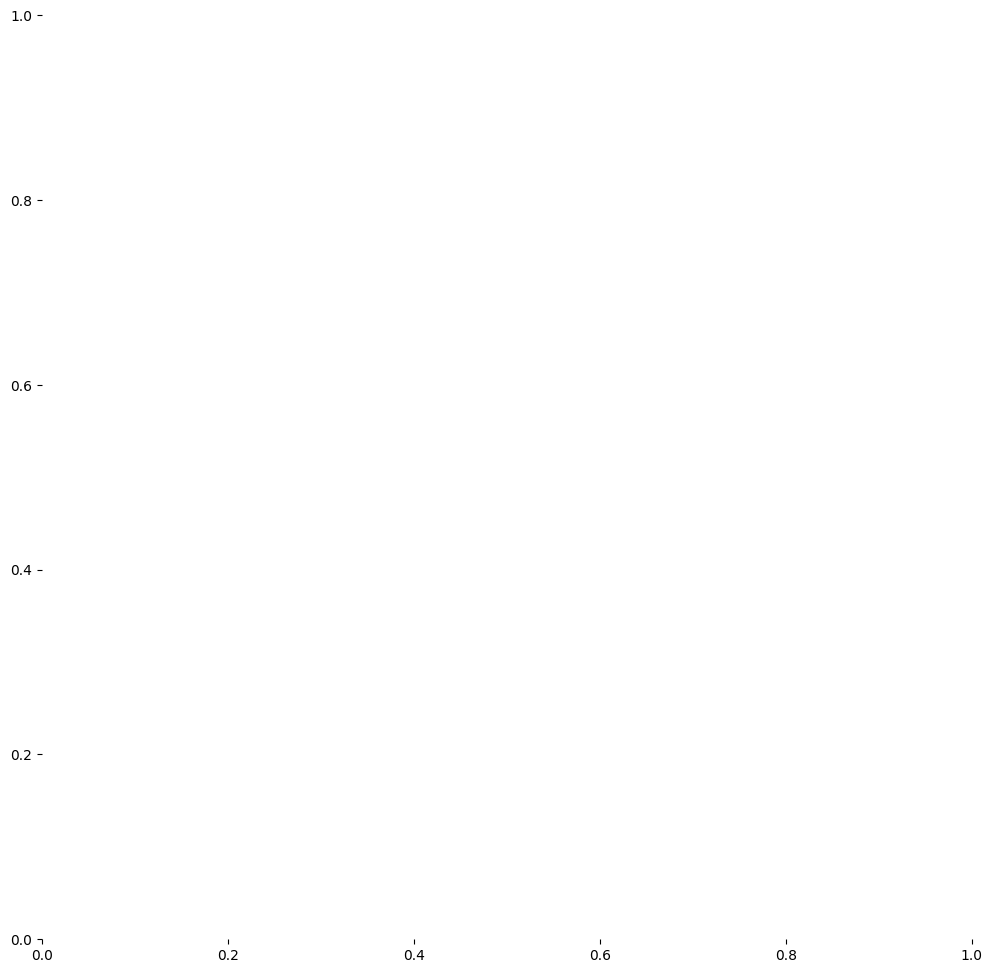

In [12]:
# plt.figure(figsize = (96,64))
# plt.xlabel('Predicted class')
# plt.ylabel('Actual class')
# ax= plt.subplot()


if dataset == "HRC":
    ax = sns.heatmap(cm_df.loc[:, 'Abuse':'Vandalism'], annot=True, fmt='.2f', cmap='gray')
if dataset == "NTU_2D":
    ax = sns.heatmap(cm_df.loc[:, "A1":"A120"], annot=True, fmt='.3f')

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix for predictions on NTU120 dataset using TTSPCC2 model')

Text(0.5, 1.0, 'Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')

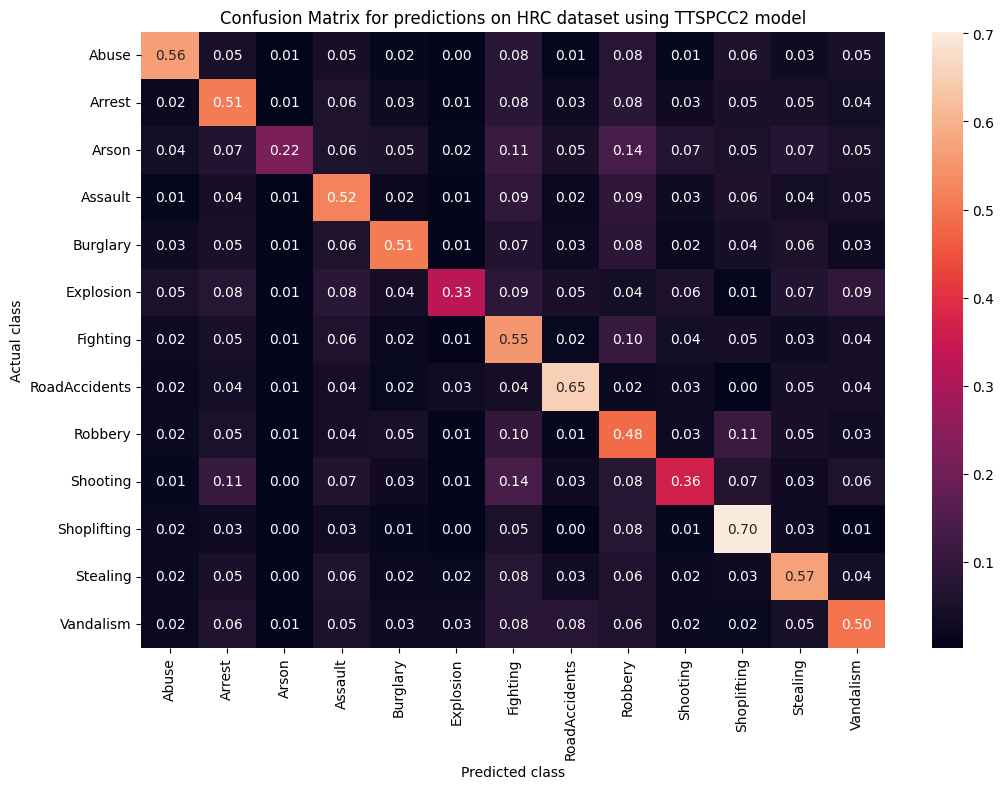

In [41]:
plt.figure(figsize = (12,8))
# plt.xlabel('Predicted class')
# plt.ylabel('Actual class')
# ax= plt.subplot()


if dataset == "HRC":
    ax = sns.heatmap(cm_df.loc[:, 'Abuse':'Vandalism'], annot=True, fmt='.2f')
if dataset == "NTU_2D":
    sns.heatmap(cm_df.loc[:, "A1":"A120"], annot=True, fmt='.2f', ax=ax)

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix for predictions on HRC dataset using TTSPCC2 model')


In [61]:
cm_df.loc[:, "A1":"A120"].sum(axis=1)

A1      1.0
A2      1.0
A3      1.0
A4      1.0
A5      1.0
       ... 
A116    1.0
A117    1.0
A118    1.0
A119    1.0
A120    1.0
Length: 120, dtype: float64

In [61]:
cm_df = pd.DataFrame(cm, index=hrc_cat, columns=hrc_cat)
cm_df['sum'] = cm_df.sum(axis=1)
cm_df

Abuse  Arrest  Arson  Assault  Burglary  Explosion  Fighting  \
Abuse          29676    2486    409     2373       818        197      4257   
Arrest          2069   45233    550     5235      2510        968      7178   
Arson            533     879   2910      790       698        200      1478   
Assault         1072    3460    561    40596      1777        678      7403   
Burglary        1692    2907    388     3367     28434        408      3749   
Explosion       1250    1808    255     1951       990       7880      2091   
Fighting        2759    5297   1029     6809      2145        806     61334   
RoadAccidents    741    1332    313     1455       603       1162      1381   
Robbery         2919    7304   1447     5505      6325       1150     13042   
Shooting         622    4710    170     2925      1396        364      6028   
Shoplifting     2620    3534    540     3754      1556        338      6085   
Stealing        1321    2813    234     3242      1154        971      4226   
Vandalism        693    1968    207     1631       798        927      2350   

               RoadAccidents  Robbery  Shooting  Shoplifting  Stealing  \
Abuse                    714     4090       735         2917      1522   
Arrest                  2457     7132      2900         4592      4365   
Arson                    661     1843       918          694       978   
Assault                 1845     7124      2347         4416      2983   
Burglary                1446     4741      1311         2514      3159   
Explosion               1211      949      1364          309      1580   
Fighting                1928    11632      4035         5138      3324   
RoadAccidents          21838      728       934          107      1517   
Robbery                 1946    64750      3612        14875      6205   
Shooting                1397     3302     15985         3034      1343   
Shoplifting              332     8540      1626        78359      3288   
Stealing                1912     3432      1182         1514     32135   
Vandalism               2348     1816       658          553      1444   

               Vandalism     sum  
Abuse               2517   52711  
Arrest              3483   88672  
Arson                692   13274  
Assault             3694   77956  
Burglary            1844   55960  
Explosion           2250   23888  
Fighting            4571  110807  
RoadAccidents       1403   33514  
Robbery             4427  133507  
Shooting            2590   43866  
Shoplifting         1064  111636  
Stealing            2168   56304  
Vandalism          15208   30601

In [62]:
cm_df.loc[:,"Abuse":"Vandalism"] = cm_df.loc[:,"Abuse":"Vandalism"].div(cm_df["sum"], axis=0)

In [63]:
cm_df

Abuse    Arrest     Arson   Assault  Burglary  Explosion  \
Abuse          0.562994  0.047163  0.007759  0.045019  0.015519   0.003737   
Arrest         0.023333  0.510116  0.006203  0.059038  0.028307   0.010917   
Arson          0.040154  0.066220  0.219226  0.059515  0.052584   0.015067   
Assault        0.013751  0.044384  0.007196  0.520755  0.022795   0.008697   
Burglary       0.030236  0.051948  0.006934  0.060168  0.508113   0.007291   
Explosion      0.052328  0.075687  0.010675  0.081673  0.041443   0.329873   
Fighting       0.024899  0.047804  0.009286  0.061449  0.019358   0.007274   
RoadAccidents  0.022110  0.039745  0.009339  0.043415  0.017992   0.034672   
Robbery        0.021864  0.054709  0.010838  0.041234  0.047376   0.008614   
Shooting       0.014180  0.107372  0.003875  0.066680  0.031824   0.008298   
Shoplifting    0.023469  0.031656  0.004837  0.033627  0.013938   0.003028   
Stealing       0.023462  0.049961  0.004156  0.057580  0.020496   0.017246   
Vandalism      0.022646  0.064312  0.006764  0.053299  0.026078   0.030293   

               Fighting  RoadAccidents   Robbery  Shooting  Shoplifting  \
Abuse          0.080761       0.013546  0.077593  0.013944     0.055339   
Arrest         0.080950       0.027709  0.080431  0.032705     0.051786   
Arson          0.111345       0.049797  0.138843  0.069158     0.052283   
Assault        0.094964       0.023667  0.091385  0.030107     0.056647   
Burglary       0.066994       0.025840  0.084721  0.023427     0.044925   
Explosion      0.087533       0.050695  0.039727  0.057100     0.012935   
Fighting       0.553521       0.017400  0.104975  0.036415     0.046369   
RoadAccidents  0.041207       0.651608  0.021722  0.027869     0.003193   
Robbery        0.097688       0.014576  0.484993  0.027055     0.111417   
Shooting       0.137419       0.031847  0.075275  0.364405     0.069165   
Shoplifting    0.054508       0.002974  0.076499  0.014565     0.701915   
Stealing       0.075057       0.033959  0.060955  0.020993     0.026890   
Vandalism      0.076795       0.076730  0.059344  0.021503     0.018071   

               Stealing  Vandalism     sum  
Abuse          0.028874   0.047751   52711  
Arrest         0.049226   0.039280   88672  
Arson          0.073678   0.052132   13274  
Assault        0.038265   0.047386   77956  
Burglary       0.056451   0.032952   55960  
Explosion      0.066142   0.094190   23888  
Fighting       0.029998   0.041252  110807  
RoadAccidents  0.045265   0.041863   33514  
Robbery        0.046477   0.033159  133507  
Shooting       0.030616   0.059043   43866  
Shoplifting    0.029453   0.009531  111636  
Stealing       0.570741   0.038505   56304  
Vandalism      0.047188   0.496977   30601

In [1]:
import pandas as pd

df = pd.read_csv('/home/s2435462/HRC/results/NTU_2D/cm.csv')

df.head()

Unnamed: 0        A1        A2        A3        A4        A5        A6  \
0         A1  0.363432  0.075091  0.172911  0.033589  0.000698  0.004034   
1         A2  0.038241  0.294830  0.065168  0.016113  0.005013  0.008880   
2         A3  0.061233  0.041624  0.595859  0.027045  0.002916  0.014798   
3         A4  0.018050  0.021182  0.030182  0.444334  0.000398  0.000000   
4         A5  0.004149  0.013485  0.008428  0.012189  0.384206  0.001167   

         A7        A8        A9  ...      A112      A113      A114      A115  \
0  0.002250  0.000000  0.000233  ...  0.000000  0.012644  0.000078  0.004499   
1  0.000430  0.000931  0.000716  ...  0.000573  0.004368  0.000215  0.001003   
2  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.007363   
3  0.000746  0.001243  0.000199  ...  0.001939  0.000746  0.000000  0.000149   
4  0.004279  0.000778  0.000648  ...  0.000000  0.000259  0.002464  0.000908   

       A116      A117      A118      A119      A120    sum  
0  0.000388  0.001008  0.000621  0.005585  0.001319  12891  
1  0.000000  0.000000  0.001003  0.000072  0.000859  13964  
2  0.000000  0.000000  0.000000  0.000073  0.004301  13718  
3  0.000000  0.000199  0.000000  0.000099  0.005619  20111  
4  0.003501  0.007391  0.012837  0.010244  0.001297   7712  

[5 rows x 122 columns]

In [6]:
for col in df.columns[1:]:
    df[col] = df[col].round(1)

In [8]:
df.to_csv('/home/s2435462/HRC/results/NTU_2D/cm_prec1.csv')

In [9]:
df.loc[:, 'A1':'A120'].sum(axis=1)

0      0.7
1      0.5
2      0.7
3      0.5
4      0.6
      ... 
115    1.0
116    0.5
117    0.7
118    0.7
119    0.8
Length: 120, dtype: float64

In [65]:
cm_df.loc[:, 'Abuse':'Vandalism'].sum(axis=1)

Abuse            1.0
Arrest           1.0
Arson            1.0
Assault          1.0
Burglary         1.0
Explosion        1.0
Fighting         1.0
RoadAccidents    1.0
Robbery          1.0
Shooting         1.0
Shoplifting      1.0
Stealing         1.0
Vandalism        1.0
dtype: float64

In [58]:
np.sum(cm_df, axis=1)

Abuse             52711
Arrest            88672
Arson             13274
Assault           77956
Burglary          55960
Explosion         23888
Fighting         110807
RoadAccidents     33514
Robbery          133507
Shooting          43866
Shoplifting      111636
Stealing          56304
Vandalism         30601
dtype: int64

TUBELET

In [1]:
import torch
from einops import rearrange

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
x = torch.ones([100,12,50])
y = rearrange(x, 'b f (h w c) -> b c f h w', h=5, w=5, c=2)

In [29]:
x.shape

torch.Size([100, 12, 50])

In [104]:
y.shape

torch.Size([100, 2, 12, 5, 5])

In [105]:
c3d = torch.nn.Conv3d(2, 128, kernel_size=(5, 2, 2), stride=(5,2,2))

In [111]:
z = c3d(y)

In [112]:
z.shape

torch.Size([100, 128, 2, 2, 2])

In [108]:
z

tensor([[[[[ 0.3231,  0.3231],
           [ 0.3231,  0.3231]],

          [[ 0.3231,  0.3231],
           [ 0.3231,  0.3231]]],


         [[[ 0.3332,  0.3332],
           [ 0.3332,  0.3332]],

          [[ 0.3332,  0.3332],
           [ 0.3332,  0.3332]]],


         [[[ 0.6983,  0.6983],
           [ 0.6983,  0.6983]],

          [[ 0.6983,  0.6983],
           [ 0.6983,  0.6983]]],


         ...,


         [[[ 1.0454,  1.0454],
           [ 1.0454,  1.0454]],

          [[ 1.0454,  1.0454],
           [ 1.0454,  1.0454]]],


         [[[-0.0201, -0.0201],
           [-0.0201, -0.0201]],

          [[-0.0201, -0.0201],
           [-0.0201, -0.0201]]],


         [[[ 0.6732,  0.6732],
           [ 0.6732,  0.6732]],

          [[ 0.6732,  0.6732],
           [ 0.6732,  0.6732]]]],



        [[[[ 0.3231,  0.3231],
           [ 0.3231,  0.3231]],

          [[ 0.3231,  0.3231],
           [ 0.3231,  0.3231]]],


         [[[ 0.3332,  0.3332],
           [ 0.3332,  0.3332]],

        

In [113]:
z_out = rearrange(z, 'b o_c d h w -> b (d h w) o_c')

In [114]:
z_out.shape

torch.Size([100, 8, 128])

In [120]:
q_2 = torch.mean(z_out, dim=1)

In [116]:
q = torch.randint(0,5,(100, 128))

In [121]:
q_2.shape

torch.Size([100, 128])

In [117]:
q.shape

torch.Size([100, 128])

In [129]:
q_3 = torch.stack((q_2, q), dim=1)
q_3.shape

torch.Size([100, 2, 128])

In [1]:
import torch
from einops import rearrange
import torch.nn.functional as F

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_keypoint(skeleton, position, dim):
    part = torch.empty(0)
    for joint in position:
        x = skeleton[:, :, (joint-1)*dim : joint*dim]
        part = torch.cat((part, x), dim=2)
    return part

In [2]:
skel = torch.randint(0, 5, [100, 24, 50])

In [4]:
y = get_keypoint(skel, [2, 4], 2)

In [5]:
y.shape

torch.Size([100, 24, 4])

In [8]:
y_ = rearrange(y, "b f (x y) -> b f x y", x= 2, y =2)

In [10]:
y_.shape

torch.Size([100, 24, 2, 2])

In [13]:
result = F.pad(input=y_, pad=(1, 1, 1, 1), mode='constant', value=0)

In [15]:
result

tensor([[[[0., 0., 0., 0.],
          [0., 0., 4., 0.],
          [0., 4., 3., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 3., 2., 0.],
          [0., 0., 4., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 1., 0.],
          [0., 2., 4., 0.],
          [0., 0., 0., 0.]],

         ...,

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 2., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 2., 4., 0.],
          [0., 1., 1., 0.],
          [0., 0., 0., 0.]]],


        [[[0., 0., 0., 0.],
          [0., 2., 1., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 4., 0., 0.],
          [0., 1., 4., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 4., 1., 0.],
          [0., 

In [38]:
torso = get_keypoint(skel, [4, 3, 9, 21, 5, 2, 17, 1, 13], 2)
elbows = get_keypoint(skel, [10, 6], 2)
wrists = get_keypoint(skel, [10, 11, 12, 24, 25, 6, 7, 8, 22, 23], 2)
knees = get_keypoint(skel, [18, 14], 2)
ankles = get_keypoint(skel, [19, 20, 15, 16], 2)

In [32]:
elbows_ = rearrange(elbows, "b f (x y) -> b f x y", x= 2, y =2)

In [33]:
elbows_.shape

torch.Size([100, 24, 2, 2])

In [22]:
torso_.shape

torch.Size([100, 24, 6, 3])

In [62]:
q = wrists

In [63]:
q = rearrange(q, "b f (x y) -> b f x y", x= 5, y =4)
print(q.shape)
q = F.pad(input=q, pad=(1, 0), mode='constant', value=0)
print(q.shape)

torch.Size([100, 24, 5, 4])
torch.Size([100, 24, 5, 5])


In [4]:
x = "1, 2, 3"
tuple(map(int, x.split(', ')))

(1, 2, 3)

In [1]:
import torch

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
x = torch.empty(0)
x.to(torch.device('cuda'))

In [3]:
x = torch.ones((2,2))
y = torch.ones((2,2))

tensor([[1., 1.],
        [1., 1.]])

In [6]:
if x.shape[1]==2:
    part = x


2

In [7]:
r = torch.ones((100,24,6,6))

In [8]:
print(r.shape)
r = r\
print(r.shape)

torch.Size([100, 24, 6, 6])
torch.Size([100, 1, 24, 6, 6])


In [9]:
r = torch.ones([100, 256, 4, 3, 3])

In [13]:
print(r.shape)
s = torch.mean(r, dim=2)
print(s.shape)

torch.Size([100, 256, 4, 3, 3])
torch.Size([100, 256, 3, 3])


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch._six import inf
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from functools import partial
from random import shuffle
from sklearn.model_selection import KFold
from prettytable import PrettyTable
from mlflow import log_metric, log_param, start_run
from datetime import timedelta
from einops import rearrange
import time
import pickle
import sys
import csv
import yaml
import numpy as np
import pandas as pd
import os
import logging
import argparse


from trajectory import Trajectory, TrajectoryDataset, extract_fixed_sized_segments, split_into_train_and_test, remove_short_trajectories, get_categories, get_UTK_categories, get_NTU_categories
from transformer import TemporalTransformer_4, TemporalTransformer_3, TemporalTransformer_2, BodyPartTransformer, SpatialTemporalTransformer, TemporalTransformer, Block, Attention, Mlp
from utils import print_statistics, SetupLogger, evaluate_all, evaluate_category, conv_to_float, SetupFolders, train_acc


In [25]:
all_categories = get_NTU_categories()

In [26]:
df_results = pd.read_csv('/home/s2435462/HRC/results/NTU_2D/NTU_2D_ttpcc2_3/results/testing.csv', delimiter=';')



headers = ['FOLD', 'CATEGORY','ACCURACY(M)','ACCURACY(W)','PRECISION(W)','RECALL(W)','F1-SCORE(W)', 'TOP_3_ACC', 'TOP_5_ACC']

# Evaluate model performance on all categories
t_all = PrettyTable(headers)
results, t_all = evaluate_all(df_results, 'ALL', t_all, len(all_categories))

#write tables to file
file_name = os.path.join('/home/s2435462/HRC/results/NTU_2D/NTU_2D_ttpcc2_3/results', 'final_performance.txt')
with open(file_name, 'w') as w:
    w.write(str(t_all))
    w.write('\n\n')
    w.write(str(t_all))

In [2]:
import torch
from einops import rearrange

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from torch.nn.functional import pad

In [4]:
x = torch.randint(0,5, (100,12,34))

In [8]:
y = pad(x, (0,16))

In [11]:
x[0,0]

tensor([3, 1, 0, 0, 1, 0, 1, 2, 2, 0, 3, 4, 1, 1, 3, 2, 1, 2, 1, 0, 3, 0, 2, 4,
        2, 4, 1, 1, 3, 4, 1, 0, 4, 2])

In [10]:
y[0,0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 2,
        2, 0, 3, 4, 1, 1, 3, 2, 1, 2, 1, 0, 3, 0, 2, 4, 2, 4, 1, 1, 3, 4, 1, 0,
        4, 2])

In [12]:
y = rearrange(y, "b f (h w c) -> b f h w c", h=5, w=5, c=2)

In [14]:
y[0,0]

tensor([[[0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         [3, 1],
         [0, 0]],

        [[1, 0],
         [1, 2],
         [2, 0],
         [3, 4],
         [1, 1]],

        [[3, 2],
         [1, 2],
         [1, 0],
         [3, 0],
         [2, 4]],

        [[2, 4],
         [1, 1],
         [3, 4],
         [1, 0],
         [4, 2]]])

In [44]:
c3d = torch.nn.Conv3d(1, 32, kernel_size=(5, 2, 2), stride=(5,2,2))

In [47]:
x = torch.ones((100, 1, 24, 6, 6))

In [48]:
y = c3d(x)
y.shape

torch.Size([100, 32, 4, 3, 3])

In [49]:
z = torch.flatten(y, start_dim=2)
z.shape

torch.Size([100, 32, 36])

In [40]:
z = torch.randint(0, 5, (4, 3, 2))

In [41]:
z

tensor([[[2, 0],
         [3, 0],
         [4, 0]],

        [[1, 4],
         [3, 0],
         [0, 4]],

        [[0, 4],
         [1, 2],
         [4, 4]],

        [[4, 0],
         [1, 4],
         [1, 1]]])

In [42]:
a = rearrange(z, "b e n -> b (n e)")
a.shape

torch.Size([4, 6])

In [43]:
a

tensor([[2, 3, 4, 0, 0, 0],
        [1, 3, 0, 4, 0, 4],
        [0, 1, 4, 4, 2, 4],
        [4, 1, 1, 0, 4, 1]])

In [34]:
a = torch.mean(z, dim=2)
a.shape

torch.Size([100, 128])

In [17]:
x.shape

torch.Size([100, 32, 300])

In [22]:
x = torch.ones((100, 32, 300))

In [23]:
y = torch.mean(x, dim=2)
y.shape

torch.Size([100, 32])

In [52]:
num_frames = 24
kernel = (5,2,2)
(int((num_frames-kernel[0])/kernel[0]) + 1) * (int((6-kernel[1])/kernel[1]) + 1) * (int((6-kernel[2])/kernel[2]) + 1)

36

In [12]:
x = torch.randint(0, 5, (100, 12, 6))
print(x)
y = rearrange(x, " b f (x y) -> b f x  y", x=2, y=3)

tensor([[[4, 3, 0, 3, 4, 4],
         [2, 4, 3, 2, 3, 4],
         [1, 4, 0, 0, 2, 1],
         ...,
         [1, 3, 3, 2, 1, 4],
         [1, 0, 4, 1, 3, 1],
         [2, 4, 4, 0, 4, 3]],

        [[4, 4, 4, 2, 0, 4],
         [0, 4, 0, 4, 0, 2],
         [0, 2, 1, 1, 0, 1],
         ...,
         [3, 3, 1, 0, 1, 3],
         [1, 0, 2, 2, 2, 1],
         [0, 2, 4, 4, 2, 4]],

        [[0, 1, 0, 4, 3, 3],
         [3, 2, 0, 4, 0, 3],
         [1, 0, 4, 2, 1, 2],
         ...,
         [4, 3, 0, 4, 1, 2],
         [0, 0, 3, 0, 3, 2],
         [1, 4, 0, 3, 3, 0]],

        ...,

        [[3, 4, 2, 1, 3, 1],
         [0, 4, 1, 3, 4, 0],
         [4, 1, 4, 3, 4, 4],
         ...,
         [3, 4, 4, 4, 4, 1],
         [4, 1, 4, 3, 2, 3],
         [4, 4, 4, 3, 3, 2]],

        [[0, 4, 0, 0, 3, 0],
         [1, 3, 1, 2, 4, 2],
         [0, 3, 1, 4, 1, 2],
         ...,
         [3, 3, 1, 1, 0, 2],
         [0, 2, 3, 2, 0, 3],
         [4, 2, 0, 1, 3, 1]],

        [[4, 1, 2, 2, 3, 4],
       

In [13]:
print(y)

tensor([[[[4, 3, 0],
          [3, 4, 4]],

         [[2, 4, 3],
          [2, 3, 4]],

         [[1, 4, 0],
          [0, 2, 1]],

         ...,

         [[1, 3, 3],
          [2, 1, 4]],

         [[1, 0, 4],
          [1, 3, 1]],

         [[2, 4, 4],
          [0, 4, 3]]],


        [[[4, 4, 4],
          [2, 0, 4]],

         [[0, 4, 0],
          [4, 0, 2]],

         [[0, 2, 1],
          [1, 0, 1]],

         ...,

         [[3, 3, 1],
          [0, 1, 3]],

         [[1, 0, 2],
          [2, 2, 1]],

         [[0, 2, 4],
          [4, 2, 4]]],


        [[[0, 1, 0],
          [4, 3, 3]],

         [[3, 2, 0],
          [4, 0, 3]],

         [[1, 0, 4],
          [2, 1, 2]],

         ...,

         [[4, 3, 0],
          [4, 1, 2]],

         [[0, 0, 3],
          [0, 3, 2]],

         [[1, 4, 0],
          [3, 3, 0]]],


        ...,


        [[[3, 4, 2],
          [1, 3, 1]],

         [[0, 4, 1],
          [3, 4, 0]],

         [[4, 1, 4],
          [3, 4, 4]],

         .

In [22]:
x = torch.ones((5,2, 24, 4, 4))
y = torch.randint(0,5, (5,2))

In [19]:
c3d = torch.nn.Conv3d(2, 128, kernel_size=(5, 3, 3), stride=(5,3,3))

In [24]:
c3d(x).shape

torch.Size([5, 128, 4, 2, 2])

In [26]:
torch.mean(torch.flatten(c3d(x), start_dim =2 ), dim=2).shape

torch.Size([5, 128])

In [15]:
print(x)
print(y)

tensor([[2, 0],
        [2, 0],
        [1, 0],
        [0, 1],
        [3, 2]])
tensor([[3, 0],
        [4, 0],
        [2, 2],
        [3, 1],
        [3, 2]])


In [17]:
print(torch.cat((x, y ), dim=1))

tensor([[2, 0, 3, 0],
        [2, 0, 4, 0],
        [1, 0, 2, 2],
        [0, 1, 3, 1],
        [3, 2, 3, 2]])


In [27]:
x = torch.randint(0, 5, (5, 10, 4))
x

tensor([[[4, 1, 0, 1],
         [4, 2, 2, 0],
         [0, 3, 4, 0],
         [2, 1, 1, 1],
         [0, 3, 3, 3],
         [0, 1, 4, 3],
         [0, 4, 4, 1],
         [2, 2, 0, 3],
         [1, 3, 3, 0],
         [1, 0, 0, 2]],

        [[3, 4, 0, 2],
         [0, 3, 1, 0],
         [3, 2, 1, 1],
         [4, 4, 4, 4],
         [1, 3, 0, 0],
         [3, 2, 0, 0],
         [3, 4, 4, 1],
         [3, 1, 0, 0],
         [1, 1, 0, 3],
         [1, 4, 4, 4]],

        [[3, 1, 3, 1],
         [2, 2, 1, 0],
         [3, 0, 0, 1],
         [3, 4, 2, 2],
         [4, 1, 3, 0],
         [2, 1, 1, 4],
         [1, 2, 0, 3],
         [4, 2, 2, 1],
         [0, 0, 1, 3],
         [1, 3, 0, 0]],

        [[1, 4, 4, 4],
         [0, 3, 0, 2],
         [4, 4, 1, 2],
         [2, 3, 4, 2],
         [3, 3, 2, 2],
         [4, 1, 2, 0],
         [0, 2, 1, 0],
         [4, 0, 3, 0],
         [2, 3, 4, 4],
         [4, 2, 1, 1]],

        [[2, 3, 4, 3],
         [2, 3, 3, 0],
         [4, 4, 0, 4],
   

In [56]:
y = rearrange(x, "b f (x y c) -> b c f x y", c = 2, x=1, y=2)

In [72]:
print(x.shape)
print("First batch, first frame ", x[0][0])
print(y.shape)
print(y[0][1][0][0][1])

torch.Size([5, 10, 4])
First batch, first frame  tensor([4, 1, 0, 1])
torch.Size([5, 2, 10, 1, 2])
tensor(1)


In [73]:
x = torch.randint(0, 5, (5, 10, 16))

In [75]:
x[0]

tensor([[3, 4, 2, 4, 4, 3, 3, 1, 0, 1, 3, 3, 2, 4, 2, 0],
        [1, 3, 4, 0, 4, 1, 3, 2, 0, 3, 4, 4, 3, 4, 1, 1],
        [3, 2, 2, 4, 0, 0, 2, 4, 3, 1, 3, 3, 3, 3, 0, 3],
        [3, 0, 1, 0, 1, 1, 0, 4, 4, 4, 0, 0, 2, 2, 4, 1],
        [2, 4, 4, 2, 3, 0, 1, 2, 4, 3, 4, 4, 2, 0, 1, 2],
        [3, 1, 2, 1, 3, 3, 3, 3, 4, 0, 0, 4, 1, 1, 2, 4],
        [2, 3, 0, 0, 0, 4, 2, 3, 0, 3, 3, 1, 0, 3, 4, 1],
        [0, 1, 4, 3, 4, 0, 3, 4, 0, 1, 2, 1, 0, 3, 1, 4],
        [2, 1, 4, 0, 3, 3, 1, 3, 3, 0, 1, 1, 1, 2, 4, 3],
        [1, 2, 1, 2, 4, 1, 3, 2, 3, 3, 3, 2, 4, 3, 3, 0]])

In [77]:
import torch.nn.functional as F

In [79]:
y = F.pad(x ,(0,2))
y[0]

tensor([[3, 4, 2, 4, 4, 3, 3, 1, 0, 1, 3, 3, 2, 4, 2, 0, 0, 0],
        [1, 3, 4, 0, 4, 1, 3, 2, 0, 3, 4, 4, 3, 4, 1, 1, 0, 0],
        [3, 2, 2, 4, 0, 0, 2, 4, 3, 1, 3, 3, 3, 3, 0, 3, 0, 0],
        [3, 0, 1, 0, 1, 1, 0, 4, 4, 4, 0, 0, 2, 2, 4, 1, 0, 0],
        [2, 4, 4, 2, 3, 0, 1, 2, 4, 3, 4, 4, 2, 0, 1, 2, 0, 0],
        [3, 1, 2, 1, 3, 3, 3, 3, 4, 0, 0, 4, 1, 1, 2, 4, 0, 0],
        [2, 3, 0, 0, 0, 4, 2, 3, 0, 3, 3, 1, 0, 3, 4, 1, 0, 0],
        [0, 1, 4, 3, 4, 0, 3, 4, 0, 1, 2, 1, 0, 3, 1, 4, 0, 0],
        [2, 1, 4, 0, 3, 3, 1, 3, 3, 0, 1, 1, 1, 2, 4, 3, 0, 0],
        [1, 2, 1, 2, 4, 1, 3, 2, 3, 3, 3, 2, 4, 3, 3, 0, 0, 0]])

In [80]:
c3d = torch.nn.Conv3d(2, 128, kernel_size=(5, 3, 3), stride=(5,3,3))

In [84]:
num_frames = 24
kernel = (5, 3, 3)
x = torch.ones((100, 2, 24, 3, 3))
y = c3d(x)
print(y.shape)
num_embed = (int((num_frames-kernel[0])/kernel[0]) + 1) * (int((3-kernel[1])/kernel[1]) + 1) * (int((3-kernel[2])/kernel[2]) + 1)
print(num_embed)


torch.Size([100, 128, 4, 1, 1])
4


In [2]:
import torch
from einops import rearrange

/home/s2435462/.conda/envs/open-mmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
x = torch.ones((100, 128, 5, 3, 3))
y = torch.flatten(x, start_dim=2)
print(y.shape)
z = rearrange(x, "b e a d c -> b (a d c) e")
print(z.shape)

torch.Size([100, 128, 45])
torch.Size([100, 45, 128])


In [9]:
pos_drop = torch.nn.Dropout(p = 0.2)
Torso_pos_embed = torch.nn.Parameter(torch.zeros(45, 128)) #9 joints

In [10]:
a = pos_drop(z + Torso_pos_embed)
print(a.shape)

torch.Size([100, 45, 128])


In [12]:
b = rearrange(a, "b n e -> b (n e)")
c = rearrange(a, "b n e -> b (n e)")
d = rearrange(a, "b n e -> b (n e)")

In [13]:
b.shape

torch.Size([100, 5760])

In [14]:
q = torch.stack((b, c, d), dim=1)
print(q.shape)

torch.Size([100, 3, 5760])


In [20]:
cls_token = torch.nn.Parameter(torch.zeros(1, 5760))

In [21]:
cls_2 = cls_token.expand(q.shape[0], -1, -1)
print(cls_token.shape)
print(cls_2.shape)

torch.Size([1, 5760])
torch.Size([100, 1, 5760])


In [22]:
w = torch.cat((cls_2, q), dim=1)
print(w.shape)

torch.Size([100, 4, 5760])


In [20]:
#### HRC
import os 

path = "/home/s2435462/HRC/HRC_files/dataverse_files/trajectories_all"
d = {}
for action in os.listdir(path):
    d[action] = {}
    action_folder = os.path.join(path, action)
    for video in os.listdir(action_folder):
        # print(video)
        video_folder = os.path.join(action_folder, video)
        if not video.startswith('.'):
            d[action][video] = len([traj for traj in os.listdir(video_folder)])
            # print([traj for traj in os.listdir(video_folder)])

In [54]:
### NTU
import os 

path = "/home/s2435462/HRC/NTU/skeleton/trajectory_csv_2D"
d2 = {}
for action in os.listdir(path):
    d2[action] = {}
    action_folder = os.path.join(path, action)
    for video in os.listdir(action_folder):
        # print(video)
        video_folder = os.path.join(action_folder, video)
        if not video.startswith('.'):
            d2[action][video] = len([traj for traj in os.listdir(video_folder)])
            # print([traj for traj in os.listdir(video_folder)])

In [21]:
d

{'Abuse': {'Abuse006': 26,
  'Abuse039': 82,
  'Abuse001': 24,
  'Abuse008': 40,
  'Abuse036': 33,
  'Abuse009': 18,
  'Abuse007': 14,
  'Abuse047': 57,
  'Abuse040': 20,
  'Abuse049': 18,
  'Abuse025': 31,
  'Abuse022': 40,
  'Abuse048': 20,
  'Abuse041': 43,
  'Abuse012': 45,
  'Abuse015': 122,
  'Abuse023': 13,
  'Abuse024': 10,
  'Abuse002': 29,
  'Abuse005': 13,
  'Abuse033': 27,
  'Abuse050': 65,
  'Abuse035': 24,
  'Abuse032': 20,
  'Abuse004': 55,
  'Abuse003': 16,
  'Abuse021': 6,
  'Abuse019': 33,
  'Abuse026': 41,
  'Abuse017': 17,
  'Abuse043': 24,
  'Abuse044': 25,
  'Abuse011': 14,
  'Abuse018': 15,
  'Abuse027': 26,
  'Abuse020': 10,
  'Abuse045': 15,
  'Abuse042': 63},
 'Arrest': {'Arrest014': 26,
  'Arrest025': 20,
  'Arrest022': 40,
  'Arrest041': 35,
  'Arrest046': 39,
  'Arrest048': 74,
  'Arrest023': 25,
  'Arrest024': 66,
  'Arrest015': 10,
  'Arrest033': 87,
  'Arrest034': 231,
  'Arrest002': 29,
  'Arrest005': 50,
  'Arrest004': 67,
  'Arrest003': 23,
  'Arrest0

In [23]:
len_list = []
for k in d.keys():
    for v in d[k].keys():
        len_list.append(d[k][v])

In [58]:
len_list2 = []
for k in d2.keys():
    for v in d2[k].keys():
        len_list2.append(d2[k][v])

In [25]:
len(len_list)

789

In [ ]:
len(len_list)

In [26]:
import matplotlib.pyplot as plt

In [31]:
[x for x in len_list if x==0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
import pandas as pd

In [59]:
len_list_pd = pd.Series(len_list)
len_list_pd2 = pd.Series(len_list2)

In [38]:
len_list_pd.describe()

count    789.000000
mean      32.570342
std       48.895638
min        0.000000
25%        9.000000
50%       18.000000
75%       38.000000
max      626.000000
dtype: float64

In [60]:
len_list_pd2.describe()

count    6540.000000
mean       21.890214
std        25.579664
min         2.000000
25%         6.000000
50%        12.000000
75%        24.000000
max       193.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f53e9175e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53e9185340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53e9175bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53e91858e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53e9185bb0>],
 'means': []}

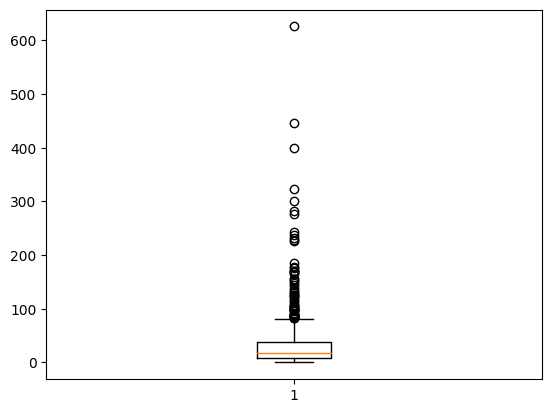

In [53]:
plt.boxplot(len_list)

In [43]:
len([x for x in len_list if x>300])

5

In [61]:
import numpy as np
npy_path = '/home/s2435462/HRC/NTU/skeleton/nturgb+d_skeletons_npy'

for file in os.listdir(npy_path):
    skeleton_npy = np.load(npy_path+'/'+file, allow_pickle=True).item() # Load the skeleton from the file
    print(skeleton_npy)


FileNotFoundError: [Errno 2] No such file or directory: 'S008C003P029R002A057.skeleton.npy'